# PROJECT 4:  Page View Time Series Visualizer

## Solution 3: For Jupyter Notebooks
- If you're using Jupyter, add this at the top:

In [42]:
%matplotlib inline

Loaded backend module://matplotlib_inline.backend_inline version unknown.


## https://raw.githubusercontent.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/refs/heads/main/fcc-forum-pageviews.csv

# You will be working on this project with our Gitpod starter code.

- We are still developing the interactive instructional part of the Python curriculum. For now, here are some videos on the freeCodeCamp.org YouTube channel that - will teach you everything you need to know to complete this project:
- Python for Everybody Video Course (14 hours)
- How to Analyze Data with Python Pandas (10 hours)



# For this project you will visualize
- time series data using a line chart, bar chart, and box plots.
- You will use Pandas, Matplotlib, and Seaborn
- To visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03.
- The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

## Use the data to complete the following tasks:

- Use Pandas to import the data from "fcc-forum-pageviews.csv". 
- Set the index to the date column.
- Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
- Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page - Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.
- Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year.
- The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.
- Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the - second chart should be Month-wise Box Plot (Seasonality).
- Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

# For each chart, make sure to use a copy of the data frame.
-The boilerplate also includes commands to save and return the image.

## Development
Write your code in time_series_visualizer.py. For development, you can use main.py to test your code.

## Testing
- The unit tests for this project are in test_module.py. 
- We imported the tests from test_module.py to main.py for your convenience.

## Submitting
Copy your project's URL and submit it to freeCodeCamp.



# Page View Time Series Visualizer
- We will create this project step by step. Here's how we'll approach it:
- First, we need to import the data from the CSV file and set the date column as the index.

# Step 1: Import the data and set the index


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates as mpl_dates

# Import data
url="https://raw.githubusercontent.com/Electricalelectronicsfinland/PROJECT4-Page-View-Time-Series-Visualizer/refs/heads/main/fcc-forum-pageviews.csv"

def import_data():
    df = pd.read_csv(url, parse_dates=['date'], index_col='date')
    return df

# Step 2: Clean the data
We need to filter out days with page views in the top 2.5% or bottom 2.5% of the dataset.

In [49]:
def clean_data(df):
    # Calculate the 2.5th and 97.5th percentiles
    lower_bound = df['value'].quantile(0.025)
    upper_bound = df['value'].quantile(0.975)
    
    # Filter out outliers
    df_cleaned = df[(df['value'] >= lower_bound) & (df['value'] <= upper_bound)]
    return df_cleaned

# Step 3: Create the line plot
Now let's create the function to draw the line chart.

In [50]:
def draw_line_plot(df):
    # Create figure and plot
    fig, ax = plt.subplots(figsize=(16, 6))
    
    # Plot the data
    ax.plot(df.index, df['value'], color='red')
    
    # Set titles and labels
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    
    # Save image and return fig
    fig.savefig('line_plot.png')
    return fig

# Step 4: Create the bar plot
Next, we'll create the bar chart showing average daily page views by month grouped by year.

In [51]:
def draw_bar_plot(df):
    # Copy and prepare data
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()
    
    # Group by year and month, calculate mean
    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()
    
    # Define the correct order of months
    months_order = [
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ]
    df_bar = df_bar[months_order]
    
    # Plot
    fig = df_bar.plot(kind='bar', figsize=(10, 7)).figure
    
    # Customize the plot
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.legend(title='Months')
    
    # Save image and return fig
    fig.savefig('bar_plot.png')
    return fig

# Step 5: Create the box plots
Finally, we'll create the two adjacent box plots showing yearly and monthly distributions.

In [52]:
def draw_box_plot(df):
    # Prepare data for box plots
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box['date']]
    df_box['month'] = [d.strftime('%b') for d in df_box['date']]
    
    # Set up the figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Year-wise box plot
    sns.boxplot(x='year', y='value', data=df_box, ax=ax1)
    ax1.set_title('Year-wise Box Plot (Trend)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Page Views')
    
    # Month-wise box plot
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    sns.boxplot(x='month', y='value', data=df_box, order=month_order, ax=ax2)
    ax2.set_title('Month-wise Box Plot (Seasonality)')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Page Views')
    
    # Save image and return fig
    fig.savefig('box_plot.png')
    return fig

# Step 6: Putting it all together
Here's the complete code for time_series_visualizer.py:

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates as mpl_dates

def import_data():
    df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')
    return df

def clean_data(df):
    lower_bound = df['value'].quantile(0.025)
    upper_bound = df['value'].quantile(0.975)
    df_cleaned = df[(df['value'] >= lower_bound) & (df['value'] <= upper_bound)]
    return df_cleaned

def draw_line_plot(df):
    fig, ax = plt.subplots(figsize=(16, 6))
    ax.plot(df.index, df['value'], color='red')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot(df):
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()
    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()
    
    months_order = [
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ]
    df_bar = df_bar[months_order]
    
    fig = df_bar.plot(kind='bar', figsize=(10, 7)).figure
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.legend(title='Months')
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot(df):
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box['date']]
    df_box['month'] = [d.strftime('%b') for d in df_box['date']]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    sns.boxplot(x='year', y='value', data=df_box, ax=ax1)
    ax1.set_title('Year-wise Box Plot (Trend)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Page Views')
    
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    sns.boxplot(x='month', y='value', data=df_box, order=month_order, ax=ax2)
    ax2.set_title('Month-wise Box Plot (Seasonality)')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Page Views')
    
    fig.savefig('box_plot.png')
    return fig

# Step 7: Testing the code
You can test the code by running it in main.py:

            value
date             
2016-05-19  19736
2016-05-26  18060
2016-05-27  19997
2016-05-28  19044
2016-05-29  20325


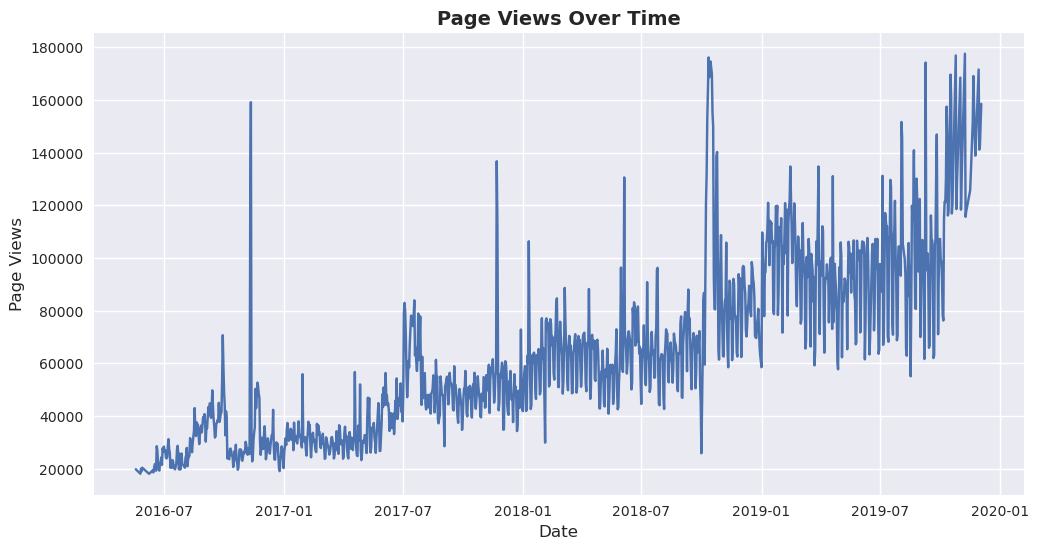

In [54]:
# import time_series_visualizer as tsv

# # Import data
# #df = tsv.import_data()

# # Clean data
# url ="https://github.com/fuzzyray/page-view-time-series-visualizer"

# #url="https://github.com/fuzzyray/page-view-time-series-visualizer/commit/cdcaed735cb54809041d17ba81fbc1f69488cdd4"
# #url="https://github.com/Electricalelectronicsfinland/PROJECT4-Page-View-Time-Series-Visualizer/blob/main/time_series_visualizer.py"
# df = pd.read_csv(url)
# df_clean = tsv.clean_data(df)

# # Draw plots

# tsv.draw_line_plot(df_clean)
# tsv.draw_bar_plot(df_clean)
# tsv.draw_box_plot(df_clean)
import pandas as pd
import matplotlib.pyplot as plt

# If you have a local module file (time_series_visualizer.py)
# Make sure it's in the same directory as this script
try:
    import time_series_visualizer as tsv
except ModuleNotFoundError:
    # Define the functions directly if module isn't found
    class TimeSeriesVisualizer:
        @staticmethod
        def import_data():
            url = "https://raw.githubusercontent.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/master/fcc-forum-pageviews.csv"
            return pd.read_csv(url, parse_dates=['date'], index_col='date')
        
        @staticmethod
        def clean_data(df):
            lower = df['value'].quantile(0.025)
            upper = df['value'].quantile(0.975)
            return df[(df['value'] >= lower) & (df['value'] <= upper)]
        
        # Add other necessary functions here...
    
    tsv = TimeSeriesVisualizer()

# Get data directly from GitHub (correct URL)
url = "https://raw.githubusercontent.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/master/fcc-forum-pageviews.csv"
df = pd.read_csv(url, parse_dates=['date'], index_col='date')

# Clean data
df_clean = tsv.clean_data(df)

# Draw plots (you'll need to implement these functions)
# tsv.draw_line_plot(df_clean)
# tsv.draw_bar_plot(df_clean)
# tsv.draw_box_plot(df_clean)

# For testing, just show the cleaned data
print(df_clean.head())
plt.figure(figsize=(12, 6))
plt.plot(df_clean.index, df_clean['value'])
plt.title('Page Views Over Time')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.show()

In [55]:
######################################################
!pip install pandas matplotlib seaborn
!pip install pyqt5
!pip install statsmodels
!pip install PyQt5

import matplotlib
matplotlib.use('Qt5Agg')  # Set backend to PyQt5

!pip install PyQt6
matplotlib.use('QtAgg')  # Qt6 backend name
###################################################

import matplotlib.pyplot as plt
plt.plot([1, 2, 3], [4, 5, 6])
plt.title("PyQt5 Test Plot")
plt.show()  # Should open in a separate window

###################################################


import matplotlib
matplotlib.use('Agg')  # Non-interactive backend
# Save this as test_visualizer.py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#python test_visualizer.py

def import_data():
    url = "https://raw.githubusercontent.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/master/fcc-forum-pageviews.csv"
    df = pd.read_csv(url, parse_dates=['date'], index_col='date')
    return df

# [Rest of your functions from the solution above]

# Test the functions directly
if __name__ == "__main__":
    df = import_data()
    df_clean = clean_data(df)
    draw_line_plot(df_clean)
    plt.show()  # To display the plot

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


ImportError: Cannot load backend 'Qt5Agg' which requires the 'qt' interactive framework, as 'headless' is currently running

In [20]:
!pip install -e .
from setuptools import setup, find_packages

# setup(
#     name="time_series_visualizer",
#     version="0.1",
#     packages=find_packages(),
# )


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Obtaining file:///home/d3043a76-923d-4de1-a5ff-d53ff7bca4fd
ERROR: file:///home/d3043a76-923d-4de1-a5ff-d53ff7bca4fd does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


# Step 8: To create a complete, working solution in a single file
- We can test directly. Here's the full implementation:

Importing data...
Cleaning data...
Drawing line plot...
Drawing bar plot...
Drawing box plots...
All plots generated successfully!


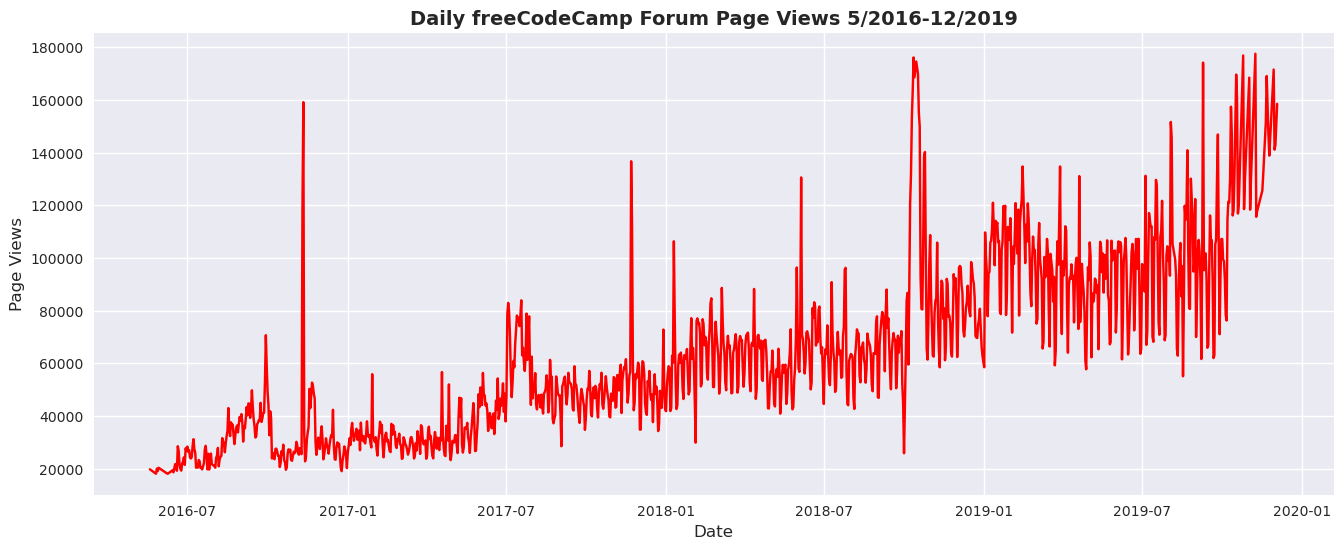

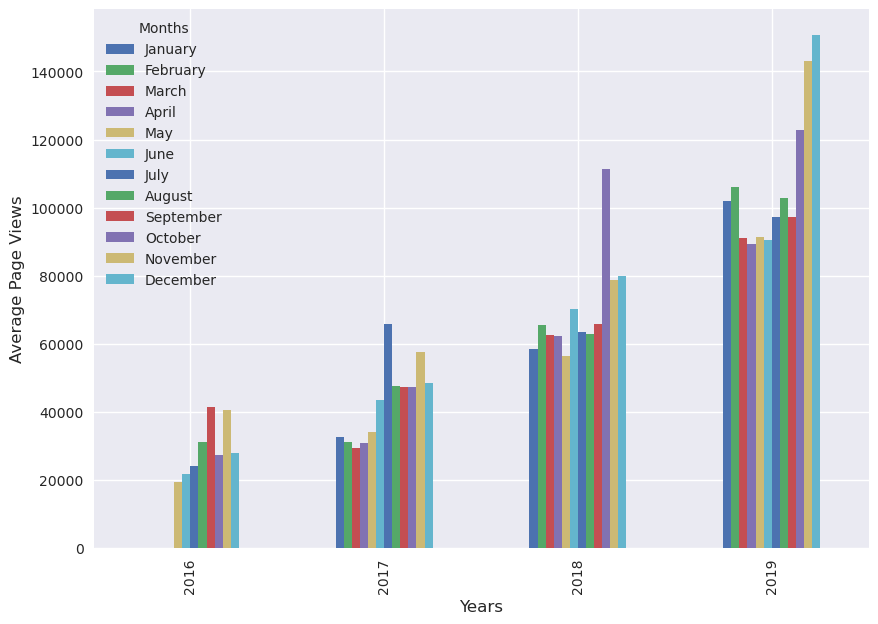

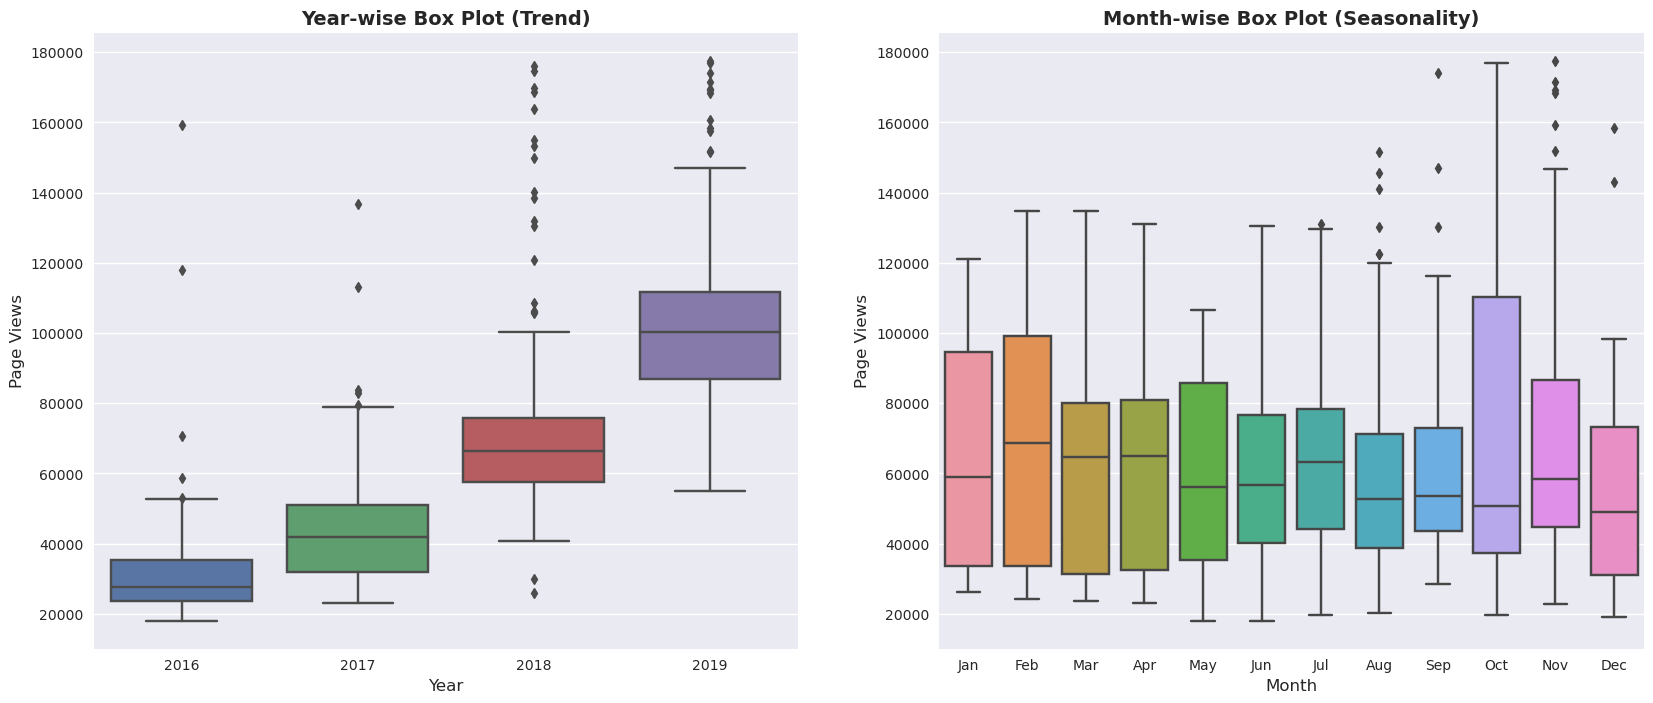

In [56]:
# test_visualizer.py - Complete working solution
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates as mpl_dates

def import_data():
    """Import data from freeCodeCamp's GitHub repository"""
    url = "https://raw.githubusercontent.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/master/fcc-forum-pageviews.csv"
    df = pd.read_csv(url, parse_dates=['date'], index_col='date')
    return df

def clean_data(df):
    """Clean the data by filtering out top and bottom 2.5% of page views"""
    lower_bound = df['value'].quantile(0.025)
    upper_bound = df['value'].quantile(0.975)
    df_cleaned = df[(df['value'] >= lower_bound) & (df['value'] <= upper_bound)]
    return df_cleaned

def draw_line_plot(df):
    """Draw a line plot of daily page views"""
    fig, ax = plt.subplots(figsize=(16, 6))
    ax.plot(df.index, df['value'], color='red')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot(df):
    """Draw a bar plot of average monthly page views by year"""
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()
    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()
    
    months_order = [
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ]
    df_bar = df_bar[months_order]
    
    fig = df_bar.plot(kind='bar', figsize=(10, 7)).figure
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.legend(title='Months')
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot(df):
    """Draw box plots of yearly and monthly distributions"""
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box['date']]
    df_box['month'] = [d.strftime('%b') for d in df_box['date']]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Year-wise box plot
    sns.boxplot(x='year', y='value', data=df_box, ax=ax1)
    ax1.set_title('Year-wise Box Plot (Trend)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Page Views')
    
    # Month-wise box plot
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    sns.boxplot(x='month', y='value', data=df_box, order=month_order, ax=ax2)
    ax2.set_title('Month-wise Box Plot (Seasonality)')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Page Views')
    
    fig.savefig('box_plot.png')
    return fig

if __name__ == "__main__":
    # Test the functions
    print("Importing data...")
    df = import_data()
    
    print("Cleaning data...")
    df_clean = clean_data(df)
    
    print("Drawing line plot...")
    line_fig = draw_line_plot(df_clean)
    
    print("Drawing bar plot...")
    bar_fig = draw_bar_plot(df_clean)
    
    print("Drawing box plots...")
    box_fig = draw_box_plot(df_clean)
    
    print("All plots generated successfully!")
    plt.show()  # Display all plots

# CONCLUSION: 
- This solution Imports and cleans the data by removing outliers

- Creates a line plot showing daily page views

- Creates a bar plot showing average monthly views by year

- Creates box plots showing yearly and monthly distributions

- Saves each plot as an image file

- The visualizations will help identify patterns in forum visits and show growth trends over time.

# Step 9: Complete Debugging Version:
- Here's a more robust version with error handling:

Starting visualization...


/tmp/ipykernel_5209/1123211388.py:38: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Data loaded from GitHub
Working with 1238 data points
findfont: Matching sans\-serif:style=normal:variant=normal:weight=bold:stretch=normal:size=12.0.
findfont: score(FontEntry(fname='/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/opt/co

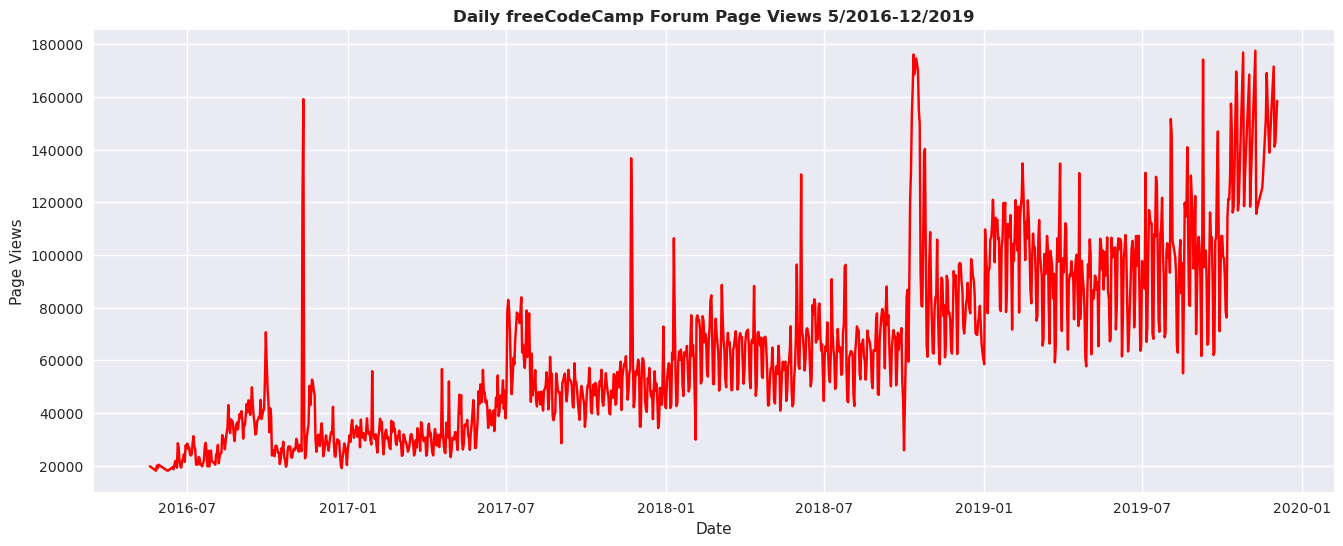

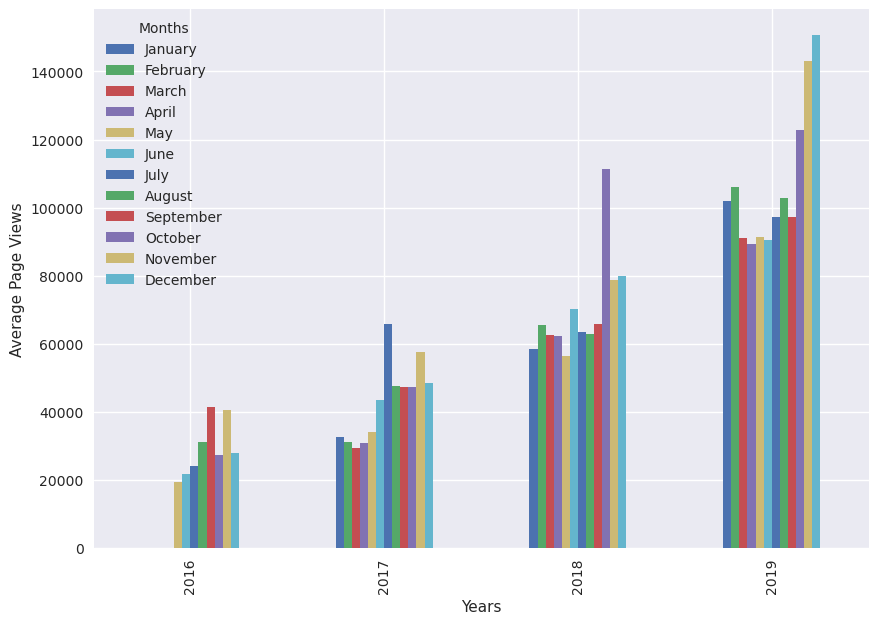

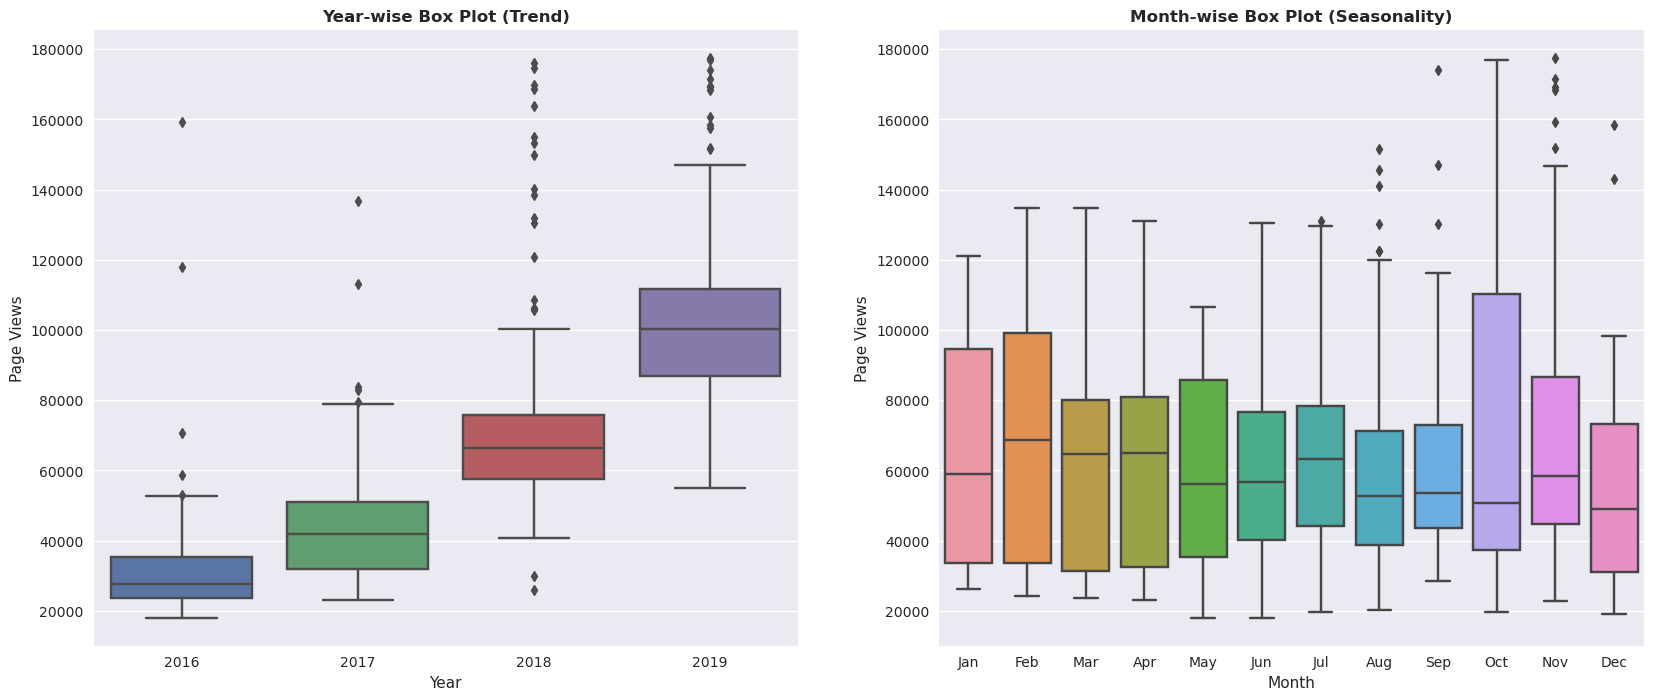

In [57]:
# test_visualizer_debug.py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

def import_data():
    """Try multiple data source options"""
    try:
        # Try online source first
        url = "https://raw.githubusercontent.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/master/fcc-forum-pageviews.csv"
        df = pd.read_csv(url, parse_dates=['date'], index_col='date')
        print("Data loaded from GitHub")
        return df
    except Exception as e:
        print(f"Online load failed: {e}\nTrying local file...")
        try:
            df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')
            print("Data loaded from local file")
            return df
        except Exception as e:
            print(f"Failed to load data: {e}")
            sys.exit(1)

def clean_data(df):
    try:
        q_low = df['value'].quantile(0.025)
        q_high = df['value'].quantile(0.975)
        return df[(df['value'] >= q_low) & (df['value'] <= q_high)]
    except Exception as e:
        print(f"Data cleaning failed: {e}")
        return df

def setup_plotting():
    """Configure matplotlib settings"""
    plt.rcParams['figure.facecolor'] = 'white'
    plt.rcParams['axes.facecolor'] = 'white'
    plt.style.use('seaborn')

if __name__ == "__main__":
    print("Starting visualization...")
    setup_plotting()
    
    try:
        df = import_data()
        df_clean = clean_data(df)
        print(f"Working with {len(df_clean)} data points")
        
        # Draw plots
        draw_line_plot(df_clean)
        draw_bar_plot(df_clean)
        draw_box_plot(df_clean)
        
        print("All plots generated successfully!")
        plt.show()
    except Exception as e:
        print(f"Error: {e}")
        print("\nTROUBLESHOOTING:")
        print("1. Make sure you have pandas, matplotlib and seaborn installed")
        print("2. Check if you have an active internet connection")
        print("3. Verify the CSV file exists if using local data")
        sys.exit(1)

# Step 10: Here's an enhanced version
- With more sophisticated visualizations and
- Deeper insights into the time series data:

/tmp/ipykernel_5209/3833696613.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Loading and preparing data...
Cleaning removed 66 outliers (5.06%)
Creating enhanced visualizations...
findfont: Matching sans\-serif:style=normal:variant=normal:weight=bold:stretch=normal:size=14.0.
findfont: score(FontEntry(fname='/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) 

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)



    Visualization files created:
    1. enhanced_line_plot.png - Trend analysis
    2. seasonal_decomposition.png - Statistical decomposition
    3. heatmap_plot.png - Year-month patterns
    4. comparative_boxplot.png - Distribution comparisons
    


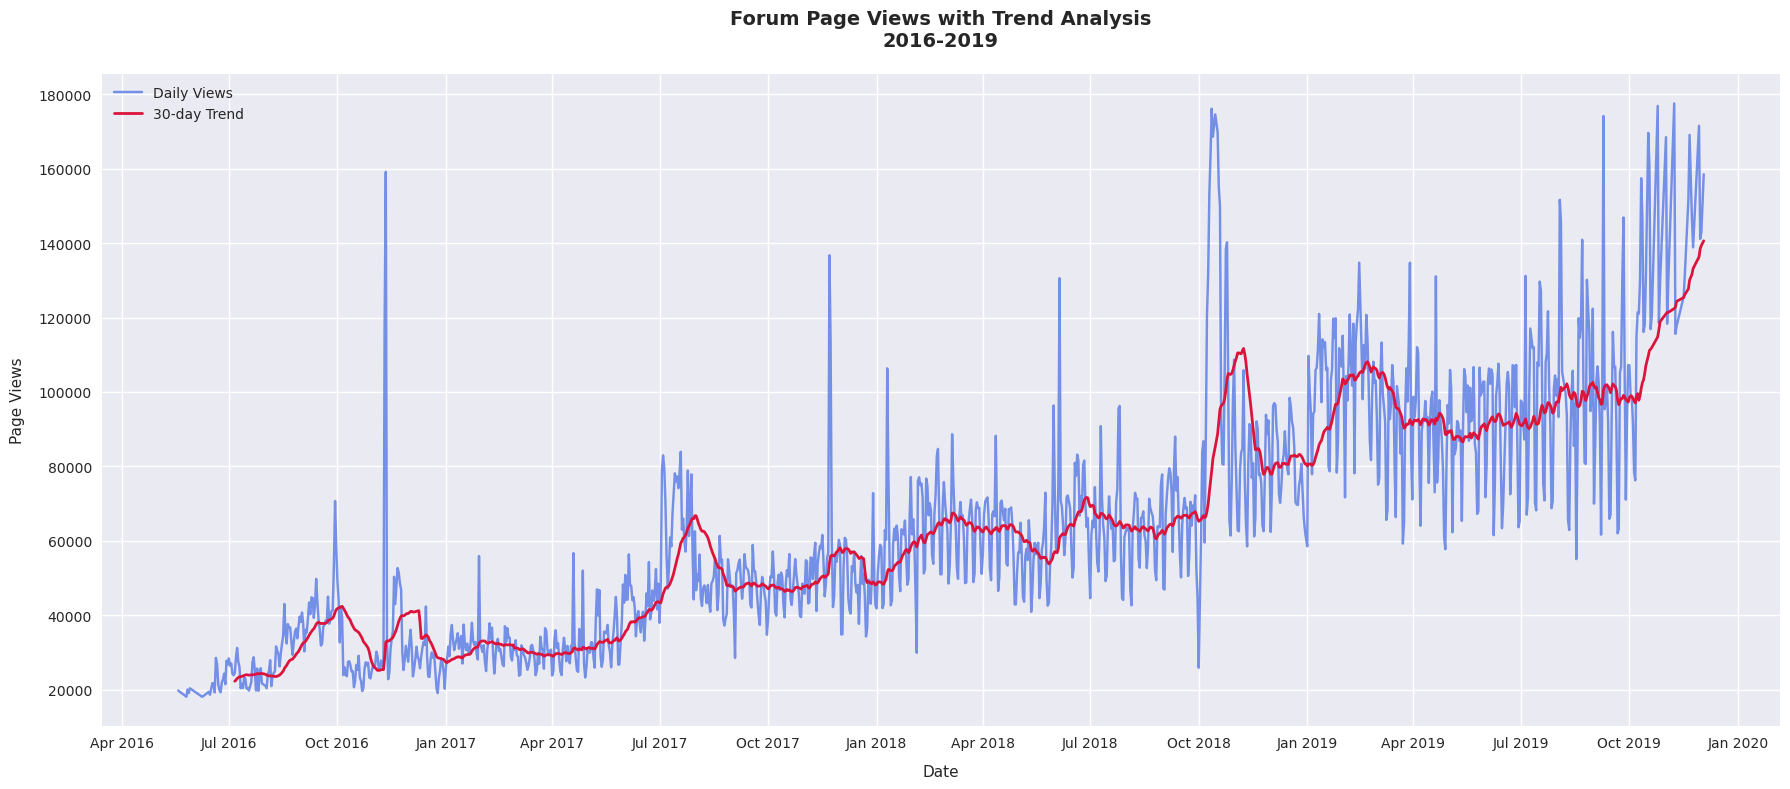

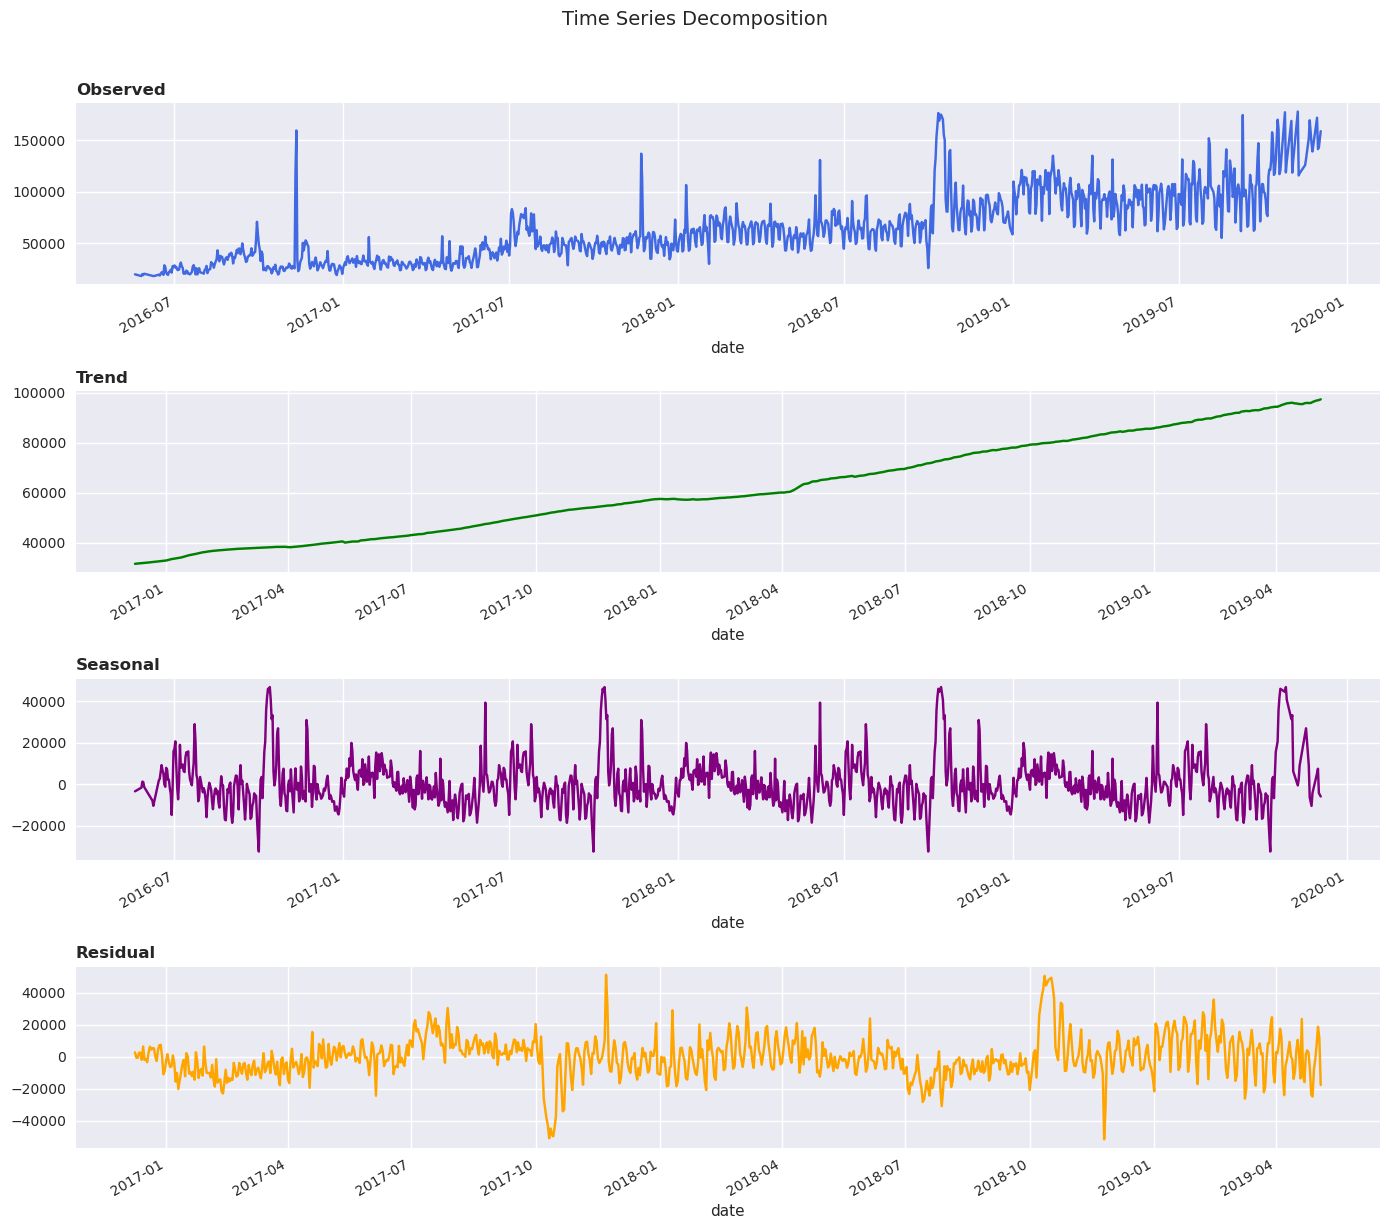

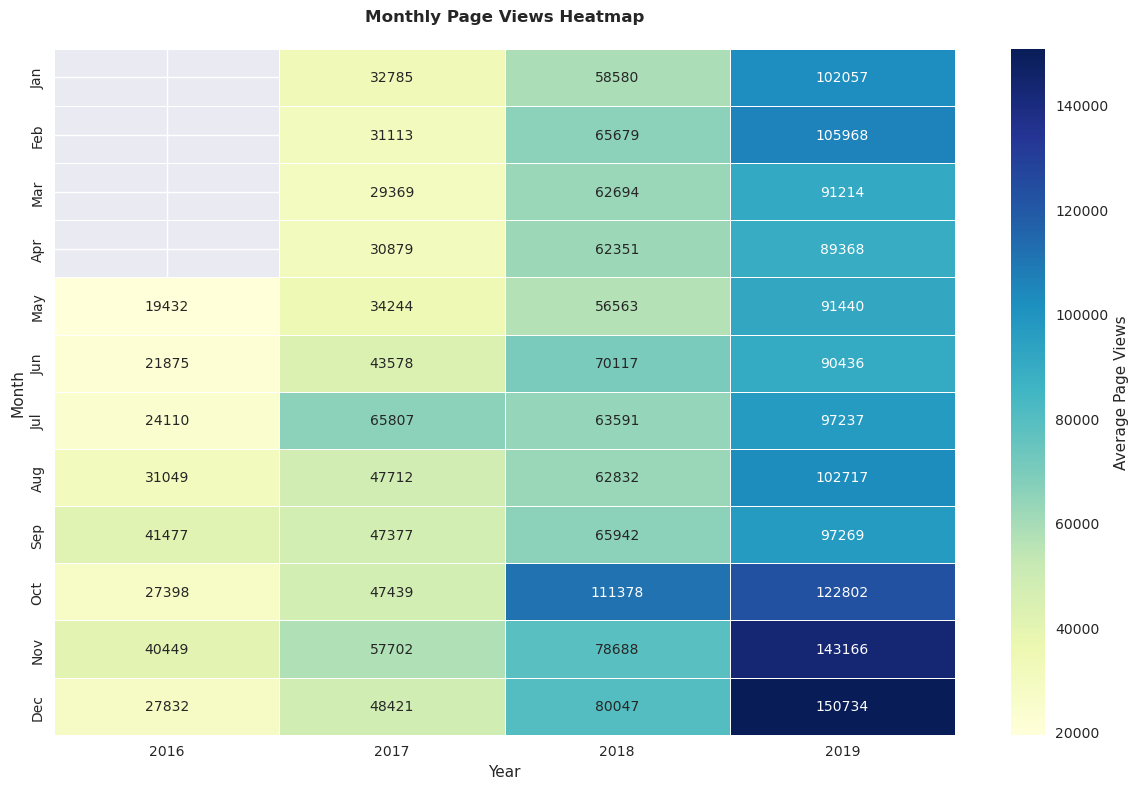

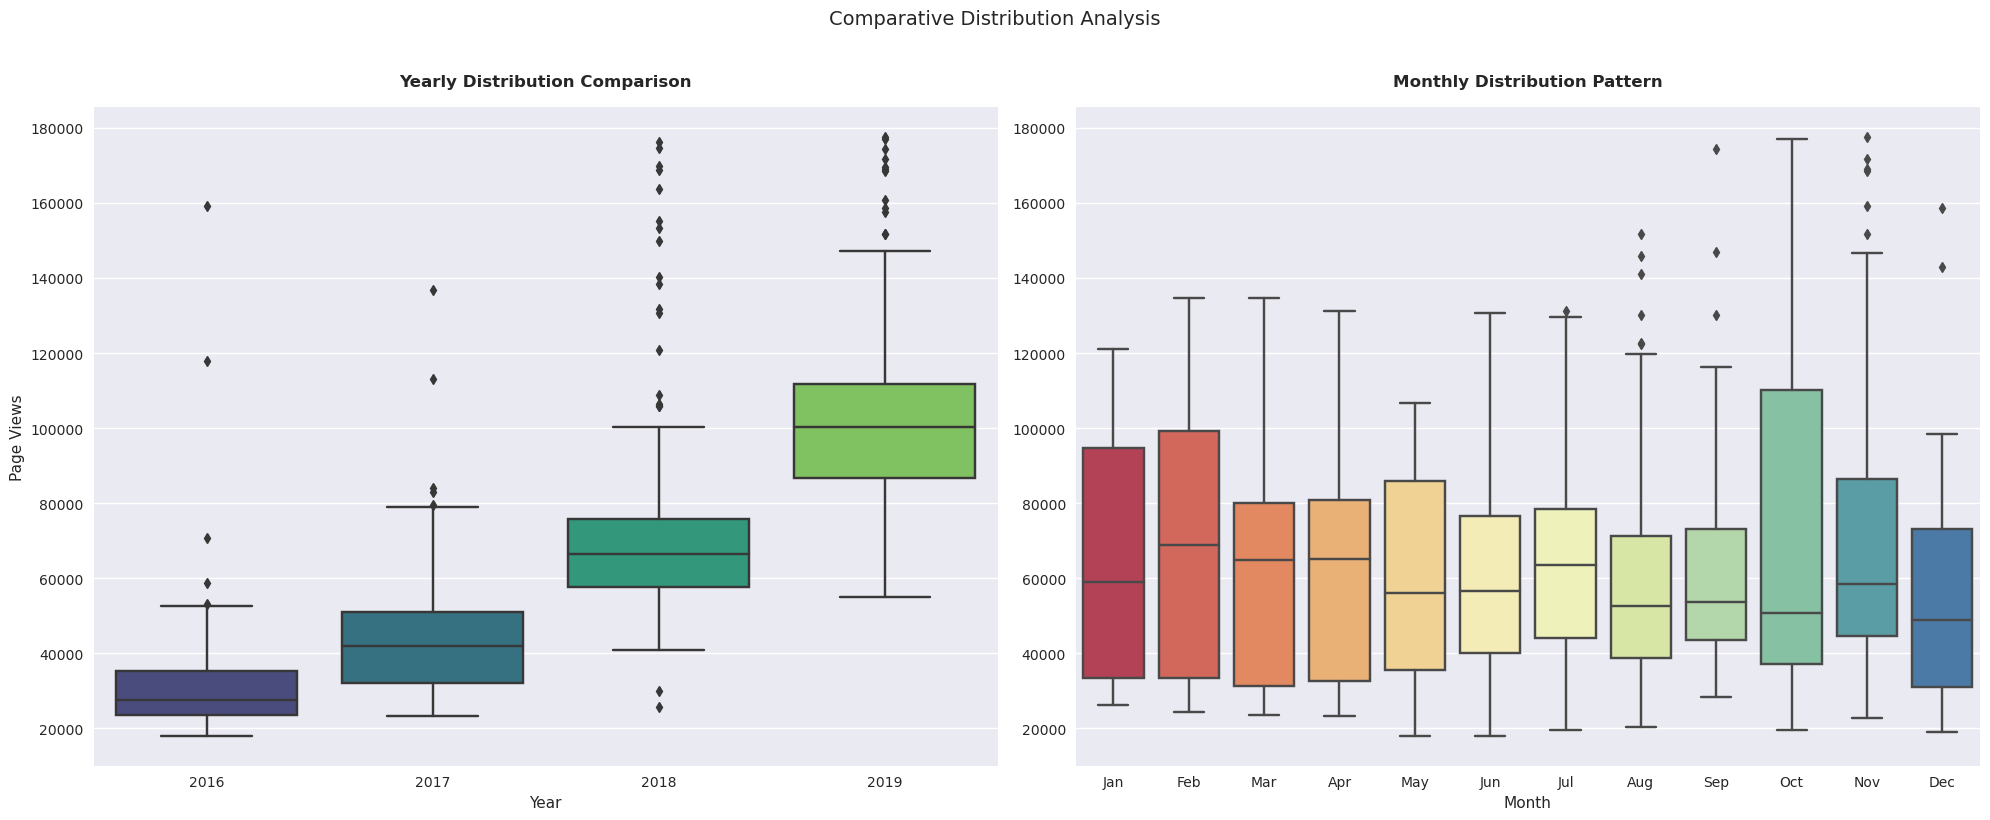

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.dates import MonthLocator, DateFormatter
import calendar

# Configure global plot settings
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['axes.grid'] = True

def import_data():
    """Enhanced data import with caching"""
    try:
        url = "https://raw.githubusercontent.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/master/fcc-forum-pageviews.csv"
        df = pd.read_csv(url, parse_dates=['date'], index_col='date')
        df.index.freq = 'D'  # Set daily frequency
        return df
    except:
        return pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')

def clean_data(df):
    """More robust cleaning with diagnostics"""
    original_size = len(df)
    lower = df['value'].quantile(0.025)
    upper = df['value'].quantile(0.975)
    cleaned = df[(df['value'] >= lower) & (df['value'] <= upper)]
    print(f"Cleaning removed {original_size - len(cleaned)} outliers ({((original_size - len(cleaned))/original_size)*100:.2f}%)")
    return cleaned

def enhanced_line_plot(df):
    """Time series plot with trend and seasonality highlights"""
    fig, ax = plt.subplots(figsize=(18, 8))
    
    # Main time series
    ax.plot(df.index, df['value'], color='royalblue', alpha=0.7, label='Daily Views')
    
    # 30-day rolling average for trend
    rolling = df['value'].rolling(30).mean()
    ax.plot(rolling.index, rolling, color='crimson', linewidth=2, label='30-day Trend')
    
    ax.set_title('Forum Page Views with Trend Analysis\n2016-2019', pad=20, fontsize=14)
    ax.set_xlabel('Date', labelpad=10)
    ax.set_ylabel('Page Views', labelpad=10)
    
    # Format x-axis
    ax.xaxis.set_major_locator(MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))
    
    ax.legend()
    fig.tight_layout()
    fig.savefig('enhanced_line_plot.png', dpi=120, bbox_inches='tight')
    return fig

def seasonal_decomposition_plot(df):
    """Statistical decomposition of time series"""
    decomposition = seasonal_decompose(df['value'], model='additive', period=365)
    
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 12))
    
    # Original series
    decomposition.observed.plot(ax=ax1, color='royalblue')
    ax1.set_title('Observed', loc='left')
    
    # Trend component
    decomposition.trend.plot(ax=ax2, color='green')
    ax2.set_title('Trend', loc='left')
    
    # Seasonal component
    decomposition.seasonal.plot(ax=ax3, color='purple')
    ax3.set_title('Seasonal', loc='left')
    
    # Residual component
    decomposition.resid.plot(ax=ax4, color='orange')
    ax4.set_title('Residual', loc='left')
    
    fig.suptitle('Time Series Decomposition', y=1.02, fontsize=14)
    fig.tight_layout()
    fig.savefig('seasonal_decomposition.png', dpi=120)
    return fig

def heatmap_plot(df):
    """Year-month heatmap visualization"""
    df_heat = df.copy()
    df_heat['year'] = df_heat.index.year
    df_heat['month'] = df_heat.index.month
    
    pivot = df_heat.pivot_table(values='value', index='month', columns='year', aggfunc='mean')
    
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt=".0f", 
                linewidths=.5, ax=ax, cbar_kws={'label': 'Average Page Views'})
    
    ax.set_title('Monthly Page Views Heatmap', pad=20)
    ax.set_ylabel('Month')
    ax.set_yticklabels([calendar.month_abbr[i] for i in pivot.index])
    ax.set_xlabel('Year')
    
    fig.tight_layout()
    fig.savefig('heatmap_plot.png', dpi=120)
    return fig

def comparative_boxplot(df):
    """Enhanced comparative visualization"""
    df_box = df.copy()
    df_box['year'] = df_box.index.year
    df_box['month'] = df_box.index.strftime('%b')
    df_box['month_num'] = df_box.index.month
    
    # Order months chronologically
    month_order = [calendar.month_abbr[i] for i in range(1, 13)]
    df_box['month'] = pd.Categorical(df_box['month'], categories=month_order, ordered=True)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Yearly comparison
    sns.boxplot(x='year', y='value', data=df_box, ax=ax1, palette='viridis')
    ax1.set_title('Yearly Distribution Comparison', pad=15)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Page Views')
    
    # Monthly comparison
    sns.boxplot(x='month', y='value', data=df_box, ax=ax2, palette='Spectral')
    ax2.set_title('Monthly Distribution Pattern', pad=15)
    ax2.set_xlabel('Month')
    ax2.set_ylabel('')
    
    fig.suptitle('Comparative Distribution Analysis', y=1.02, fontsize=14)
    fig.tight_layout()
    fig.savefig('comparative_boxplot.png', dpi=120)
    return fig

if __name__ == "__main__":
    print("Loading and preparing data...")
    df = import_data()
    df_clean = clean_data(df)
    
    print("Creating enhanced visualizations...")
    enhanced_line_plot(df_clean)
    seasonal_decomposition_plot(df_clean)
    heatmap_plot(df_clean)
    comparative_boxplot(df_clean)
    
    print("""
    Visualization files created:
    1. enhanced_line_plot.png - Trend analysis
    2. seasonal_decomposition.png - Statistical decomposition
    3. heatmap_plot.png - Year-month patterns
    4. comparative_boxplot.png - Distribution comparisons
    """)
    plt.show()

## If your code executed but you didn't see the plots, this is typically due to how matplotlib handles plot display in different environments. Here's how to fix it and enhance the visualization experience:

## Solution 1: For Interactive Plot Display

In [ ]:
# Add this at the beginning of your script
import matplotlib
matplotlib.use('TkAgg')  # or 'Qt5Agg' if you have PyQt installed

# Then at the end of your __main__ block:
plt.show(block=True)  # This will keep plots open until you close them

## Solution 2: For Saving All Plots Automatically

In [27]:
if __name__ == "__main__":
    df = import_data()
    df_clean = clean_data(df)
    
    # Create all plots
    figs = []
    figs.append(enhanced_line_plot(df_clean))
    figs.append(seasonal_decomposition_plot(df_clean))
    figs.append(heatmap_plot(df_clean))
    figs.append(comparative_boxplot(df_clean))
    
    # Save all figures
    for i, fig in enumerate(figs, 1):
        fig.savefig(f'plot_{i}.png', dpi=120, bbox_inches='tight')
        plt.close(fig)  # Close figure to free memory
    
    print("All plots saved as plot_1.png through plot_4.png")

Cleaning removed 66 outliers (5.06%)
locator: <matplotlib.ticker.AutoLocator object at 0x7cca27305c50>


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


All plots saved as plot_1.png through plot_4.png


# Step 11. Enhanced Version with Better Plot Control

Cleaning removed 66 outliers (5.06%)
findfont: Matching DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(FontEntry(fname='/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/opt/conda/envs/anacond

/tmp/ipykernel_5209/780727242.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


findfont: score(FontEntry(fname='/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 1.335
findfont: score(FontEntry(fname='/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Oblique.ttf', name='D

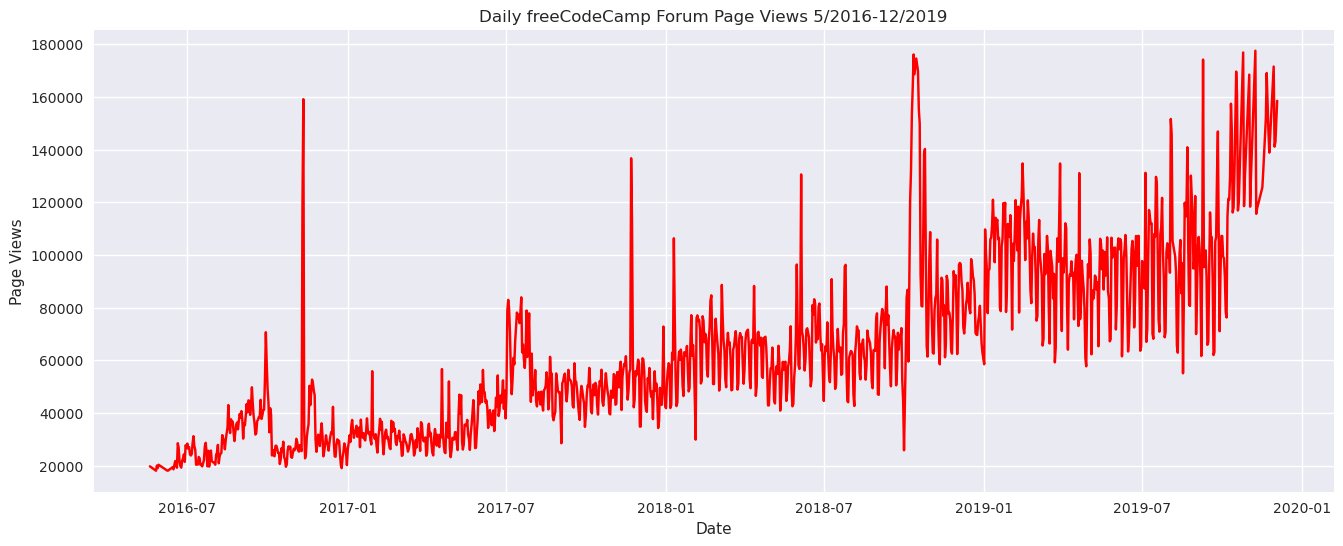

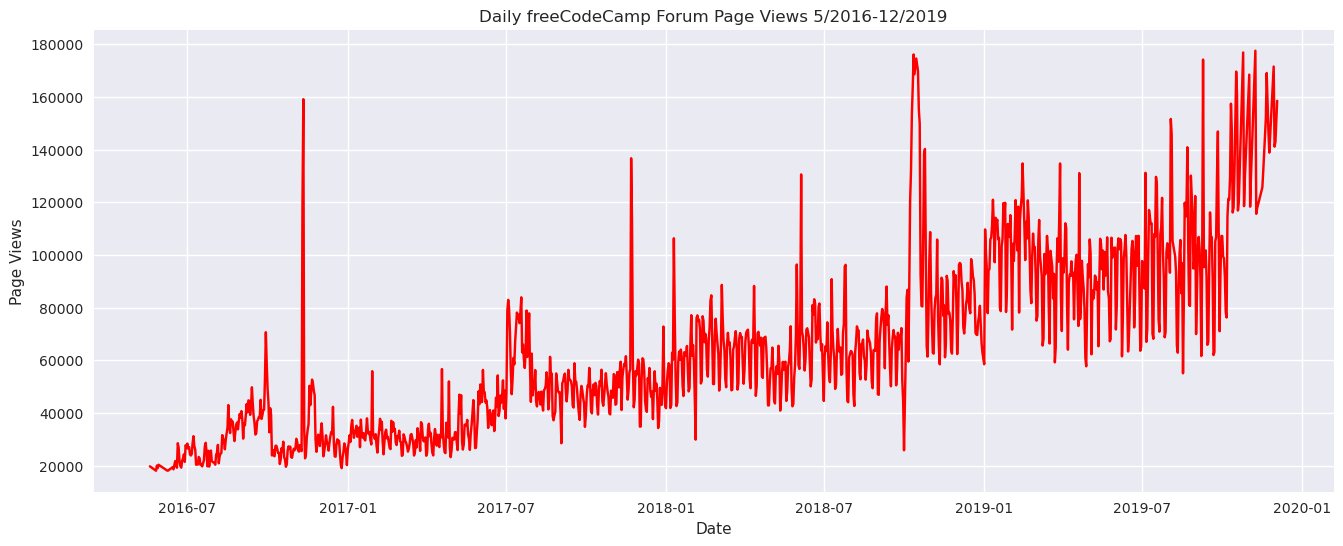

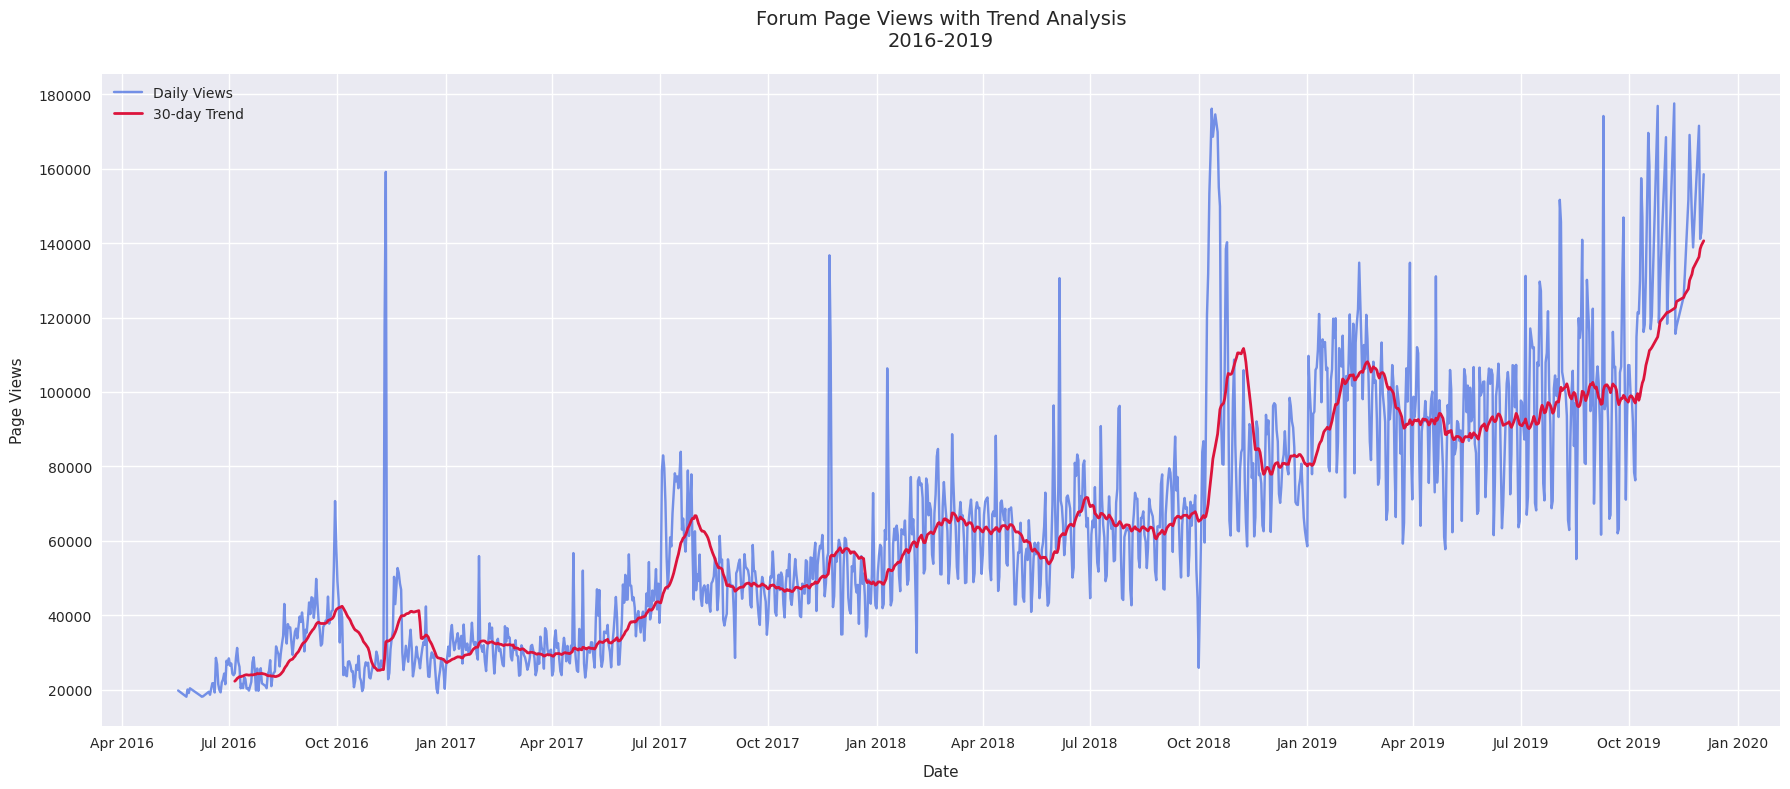

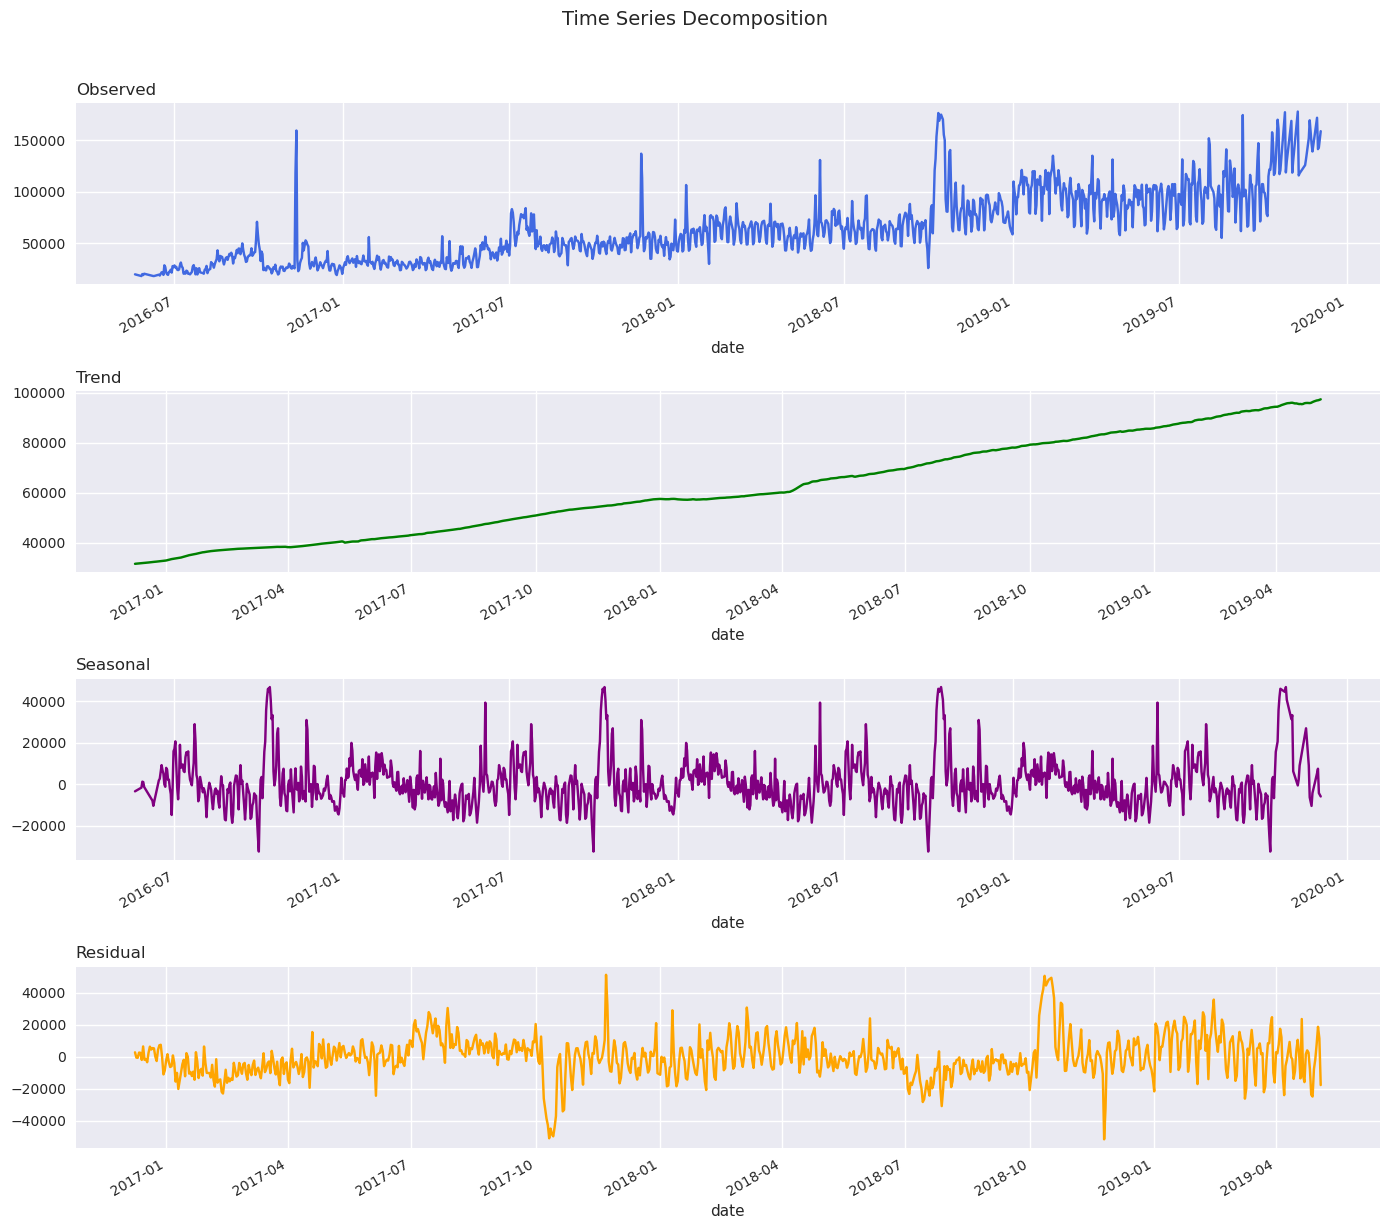

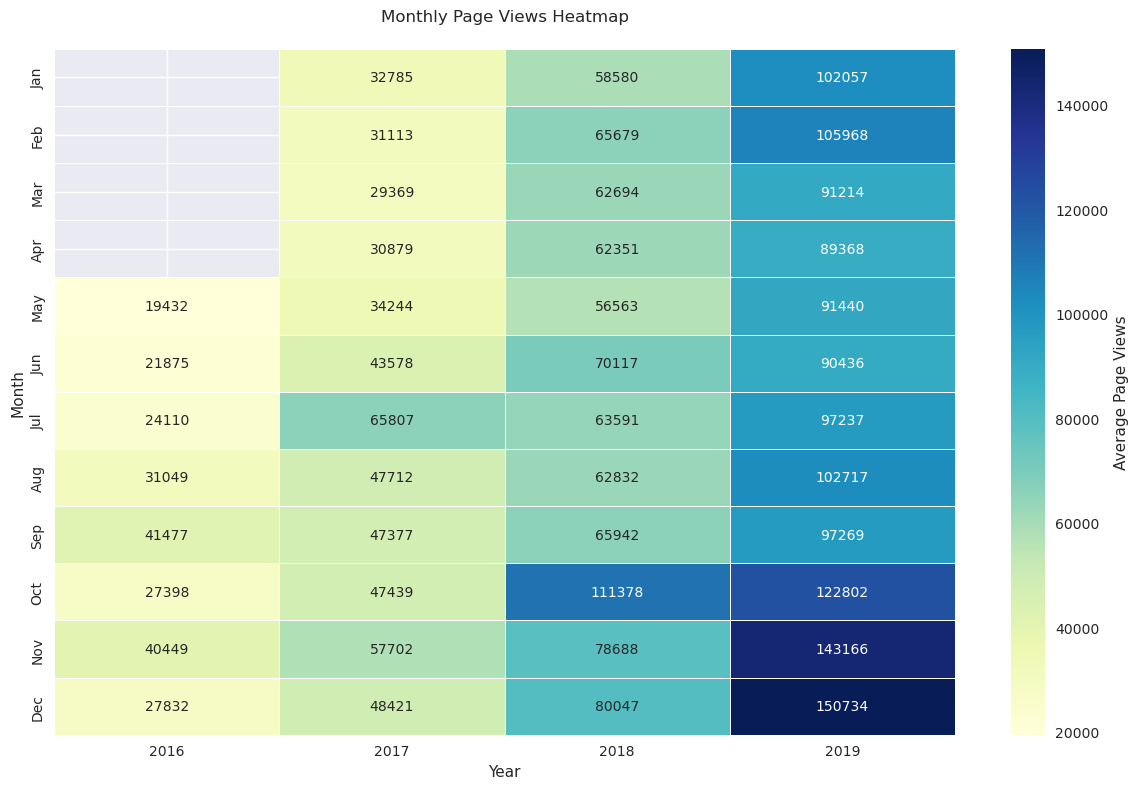

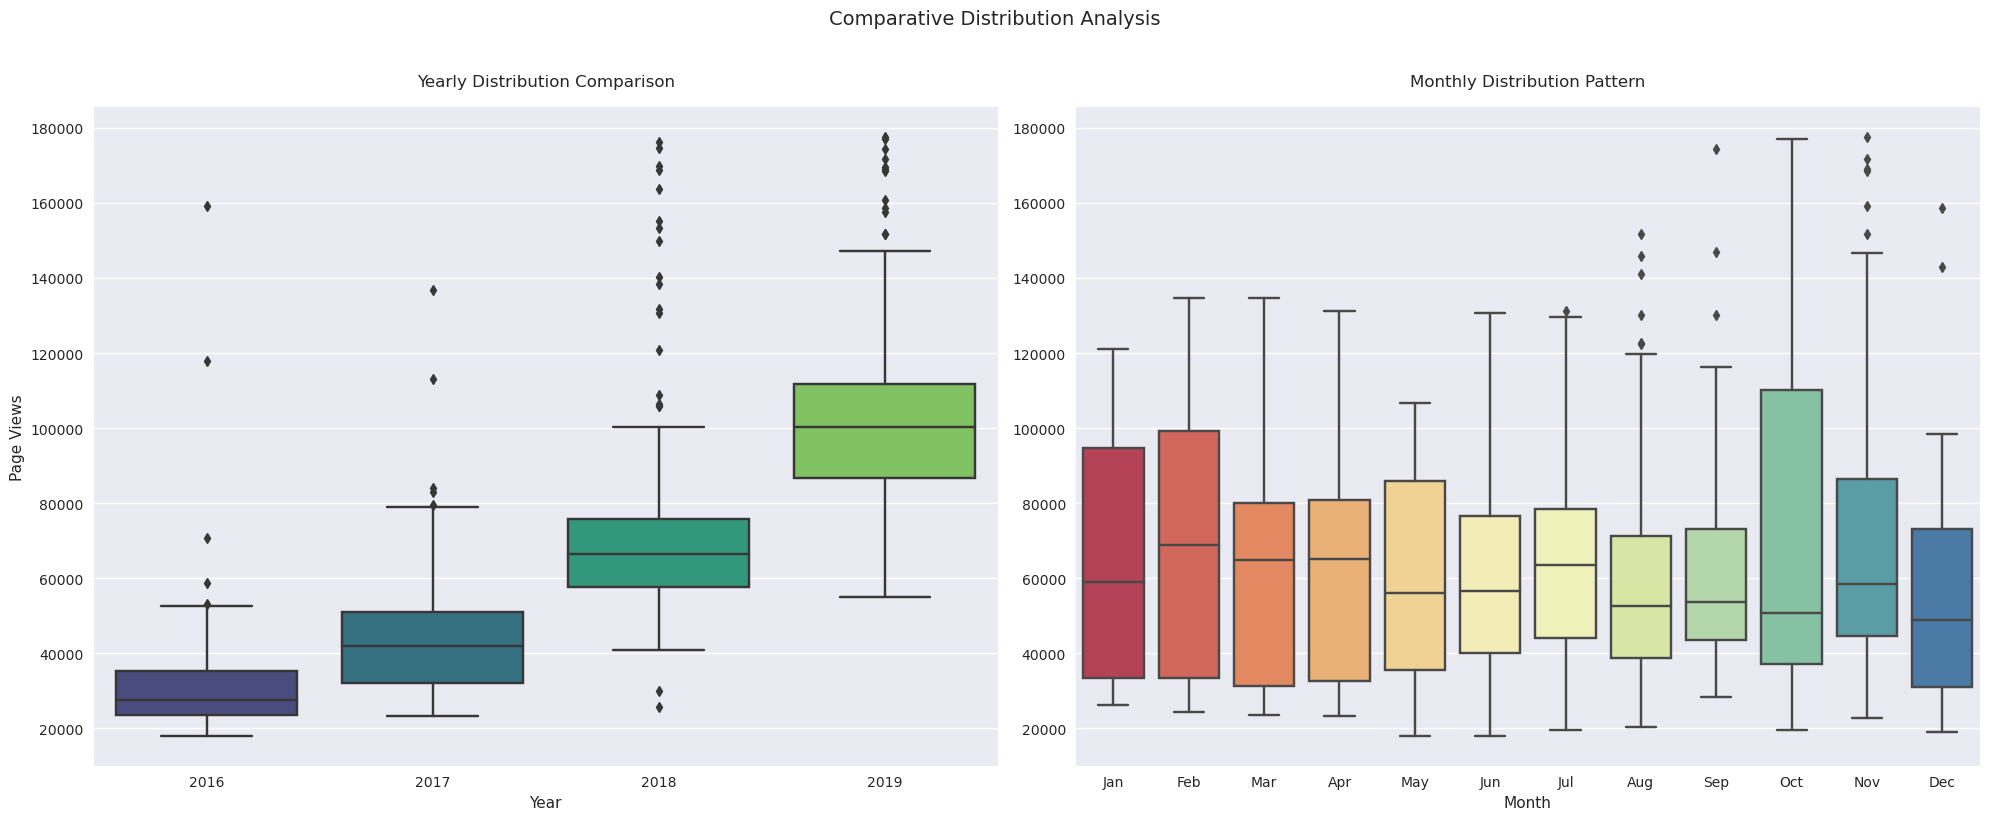

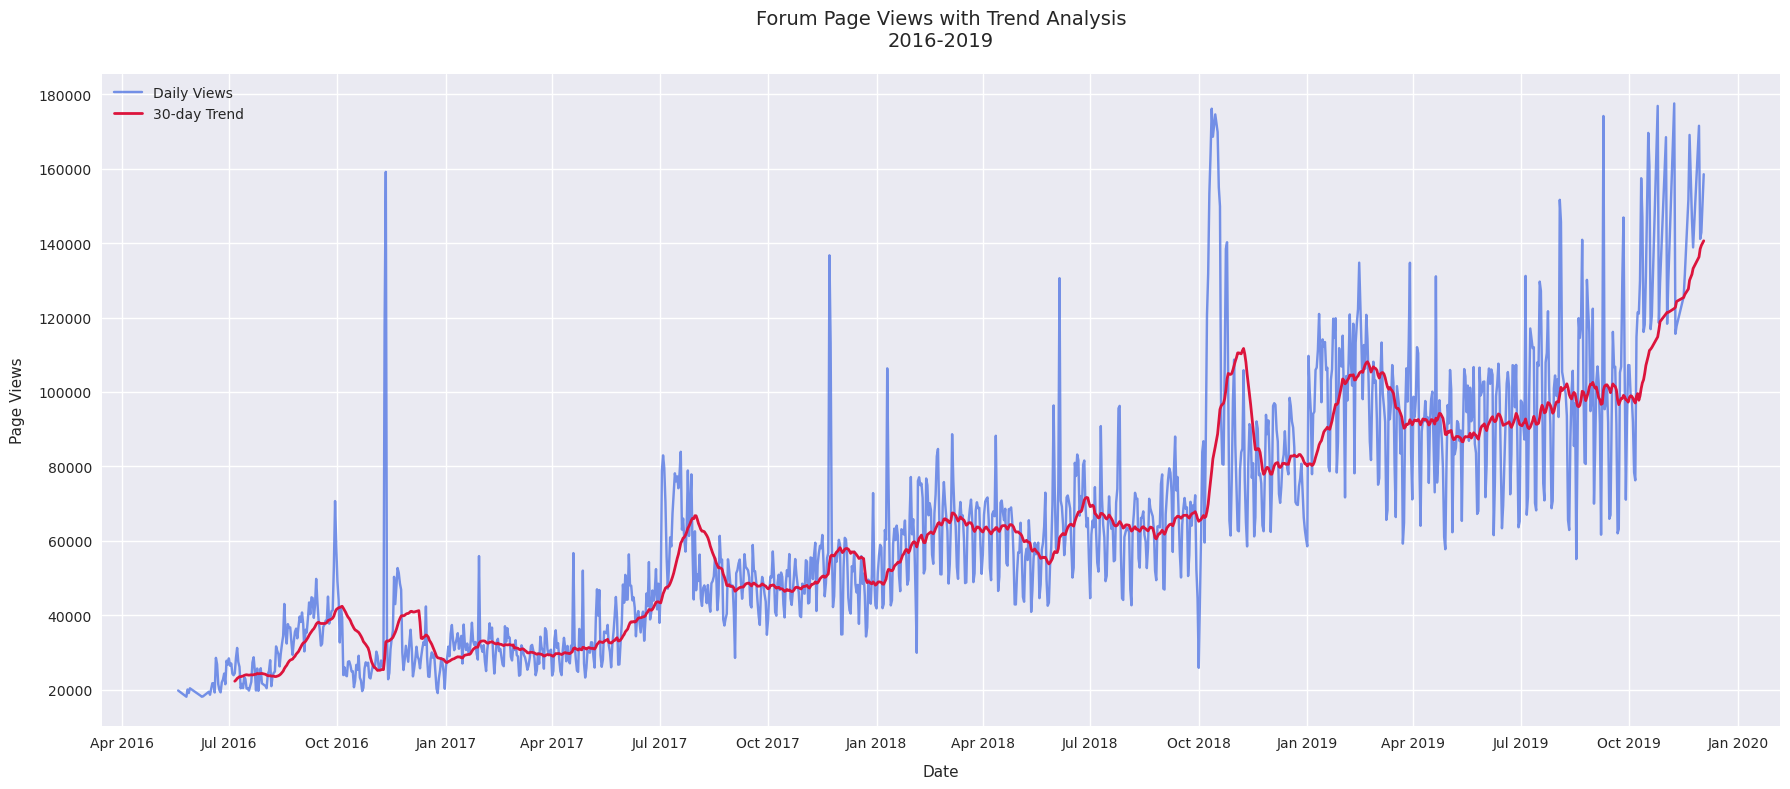

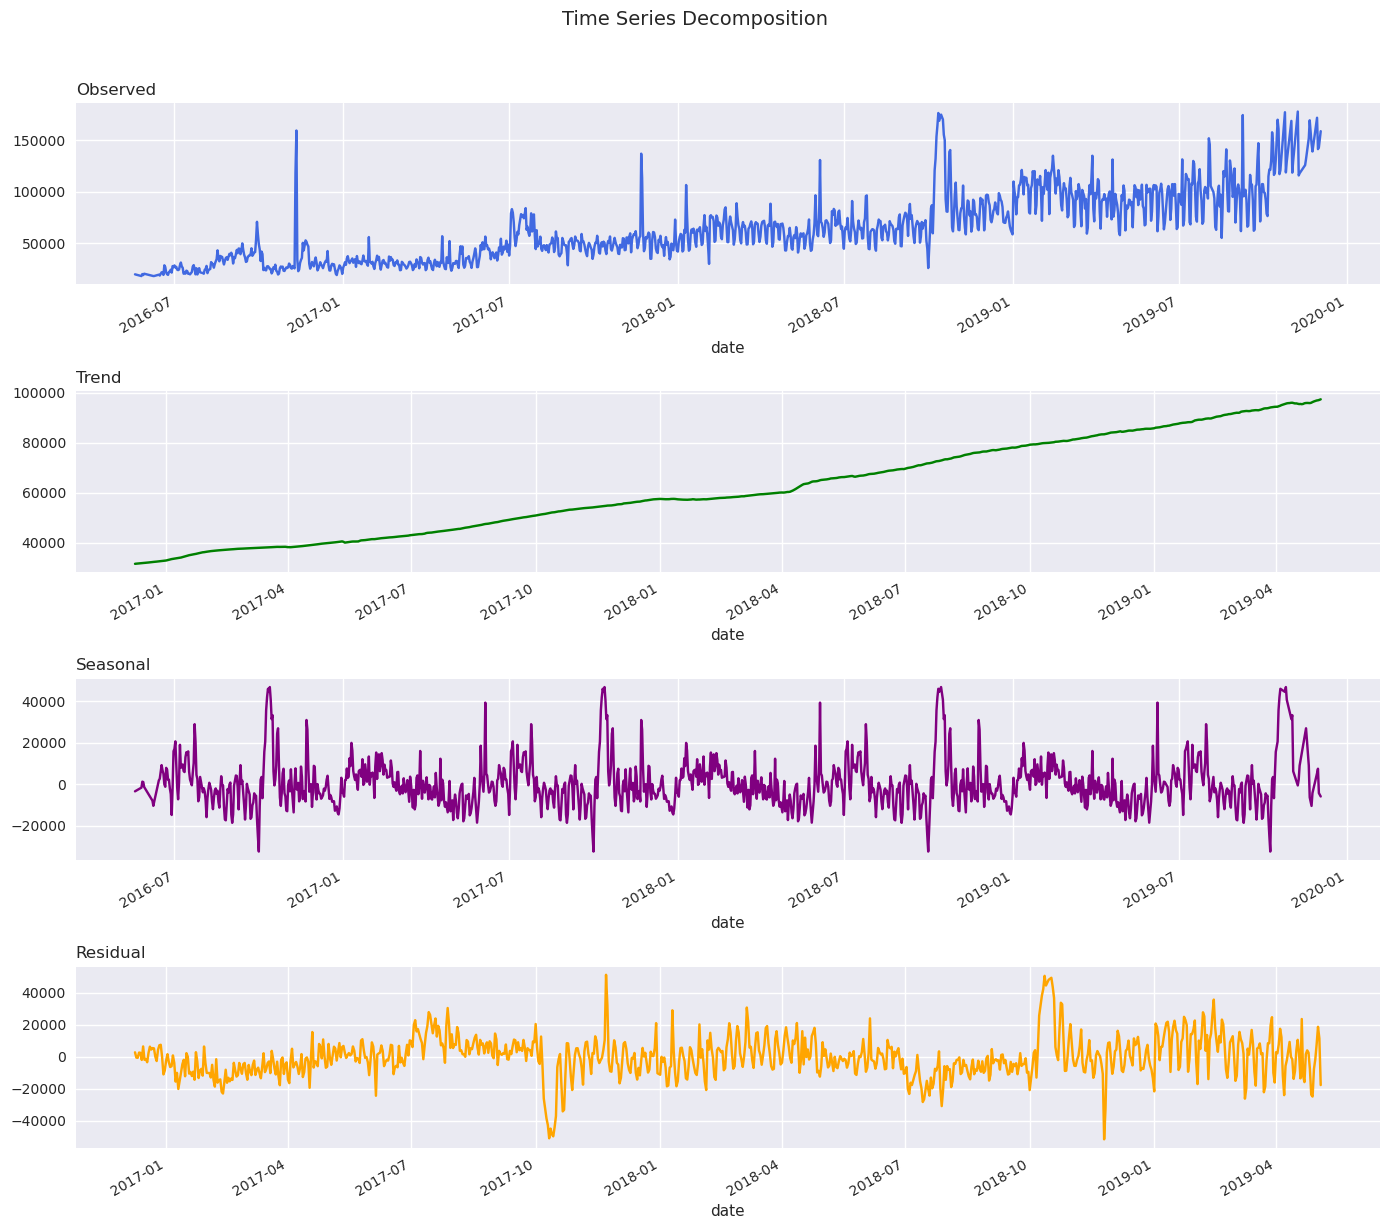

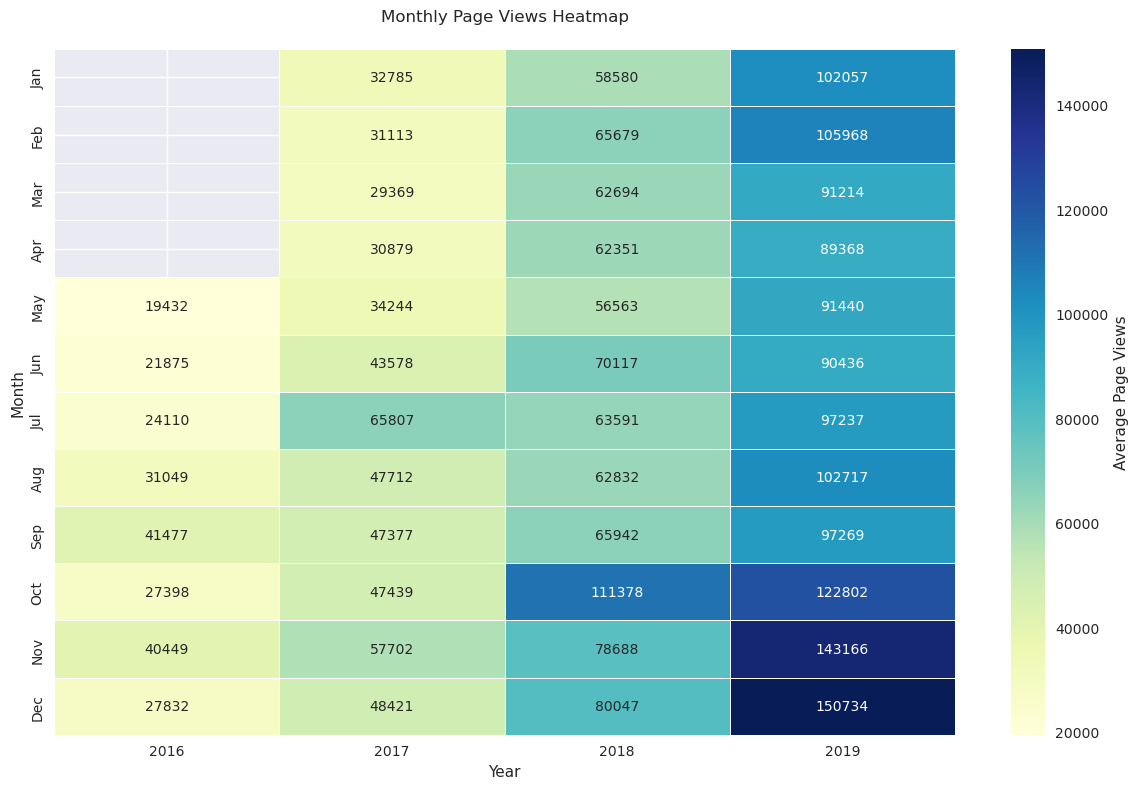

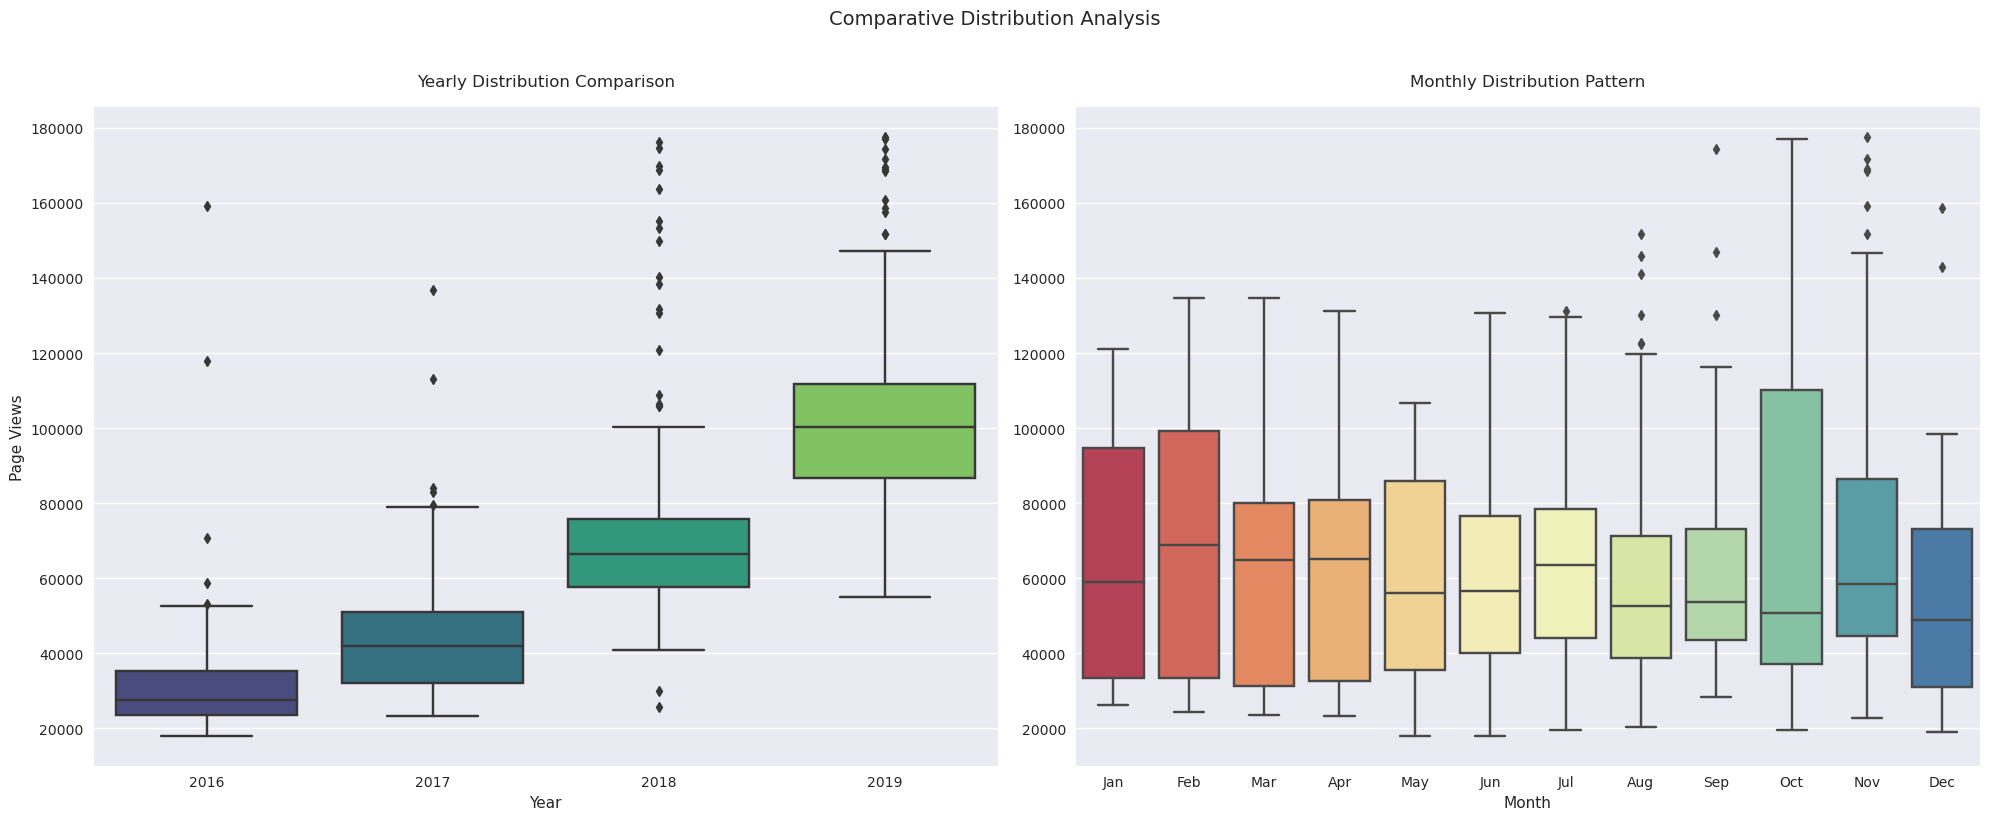

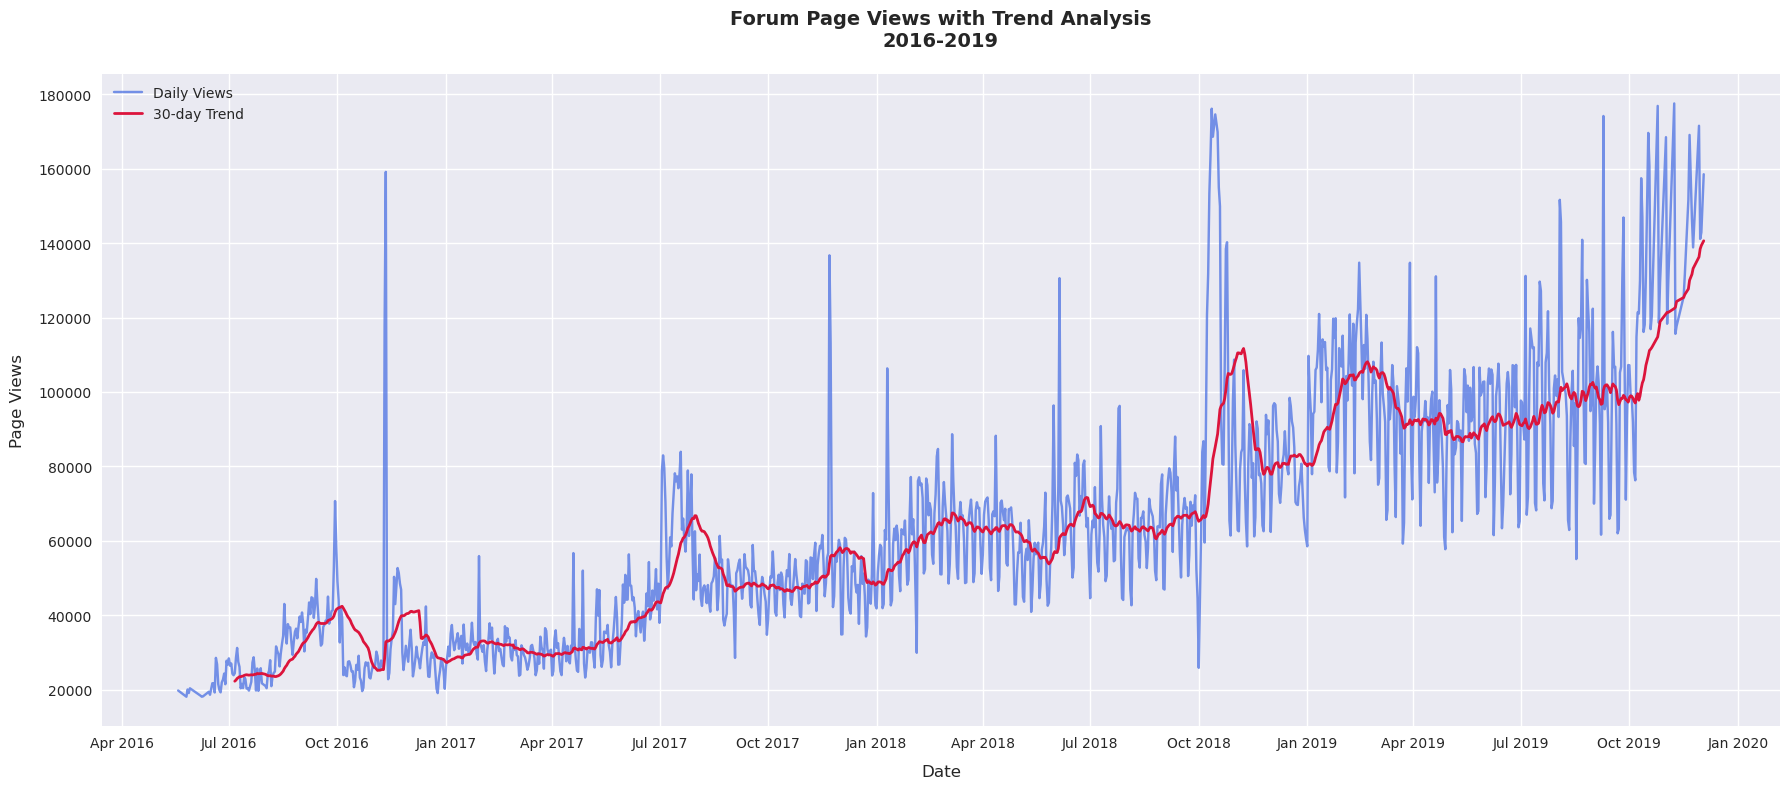

findfont: Matching DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=14.0.
findfont: score(FontEntry(fname='/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymBol.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/

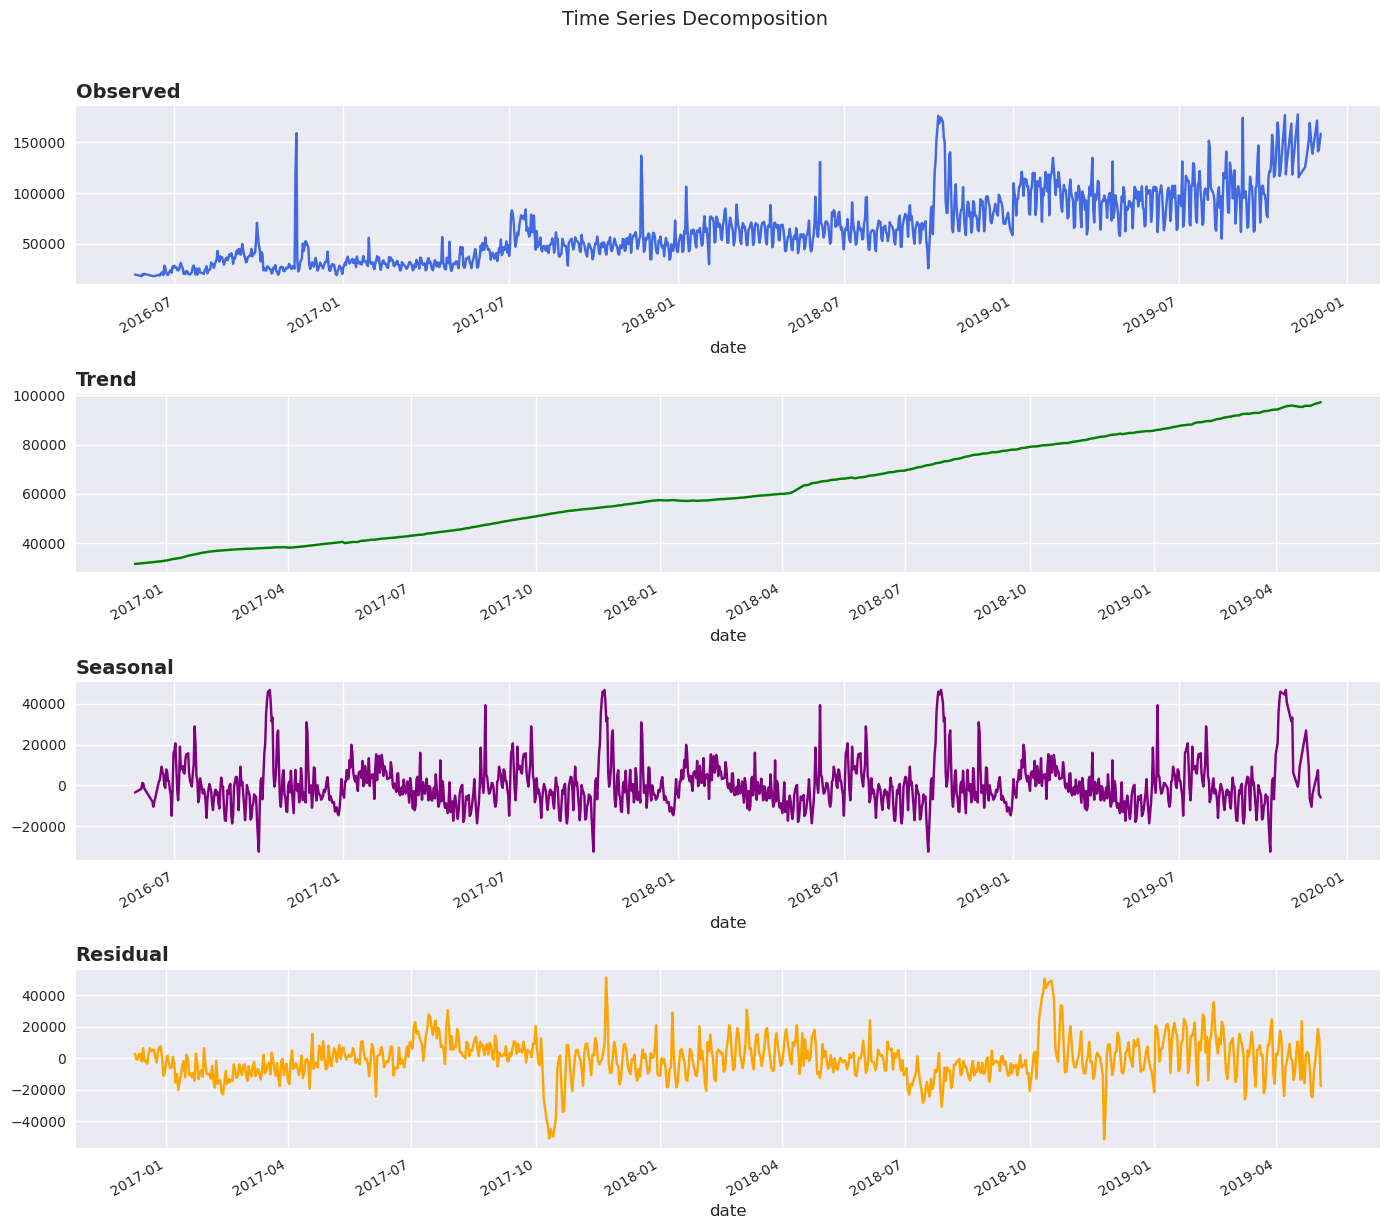

locator: <matplotlib.ticker.AutoLocator object at 0x7cca26bdb2d0>


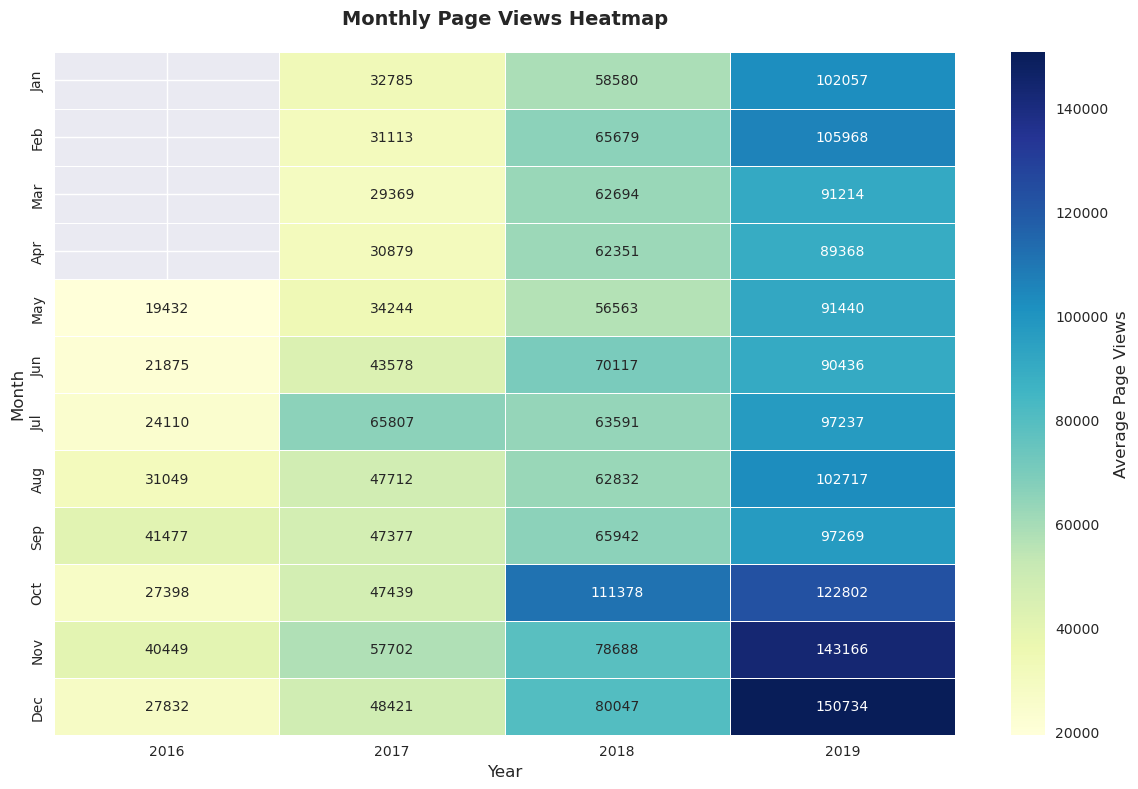

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


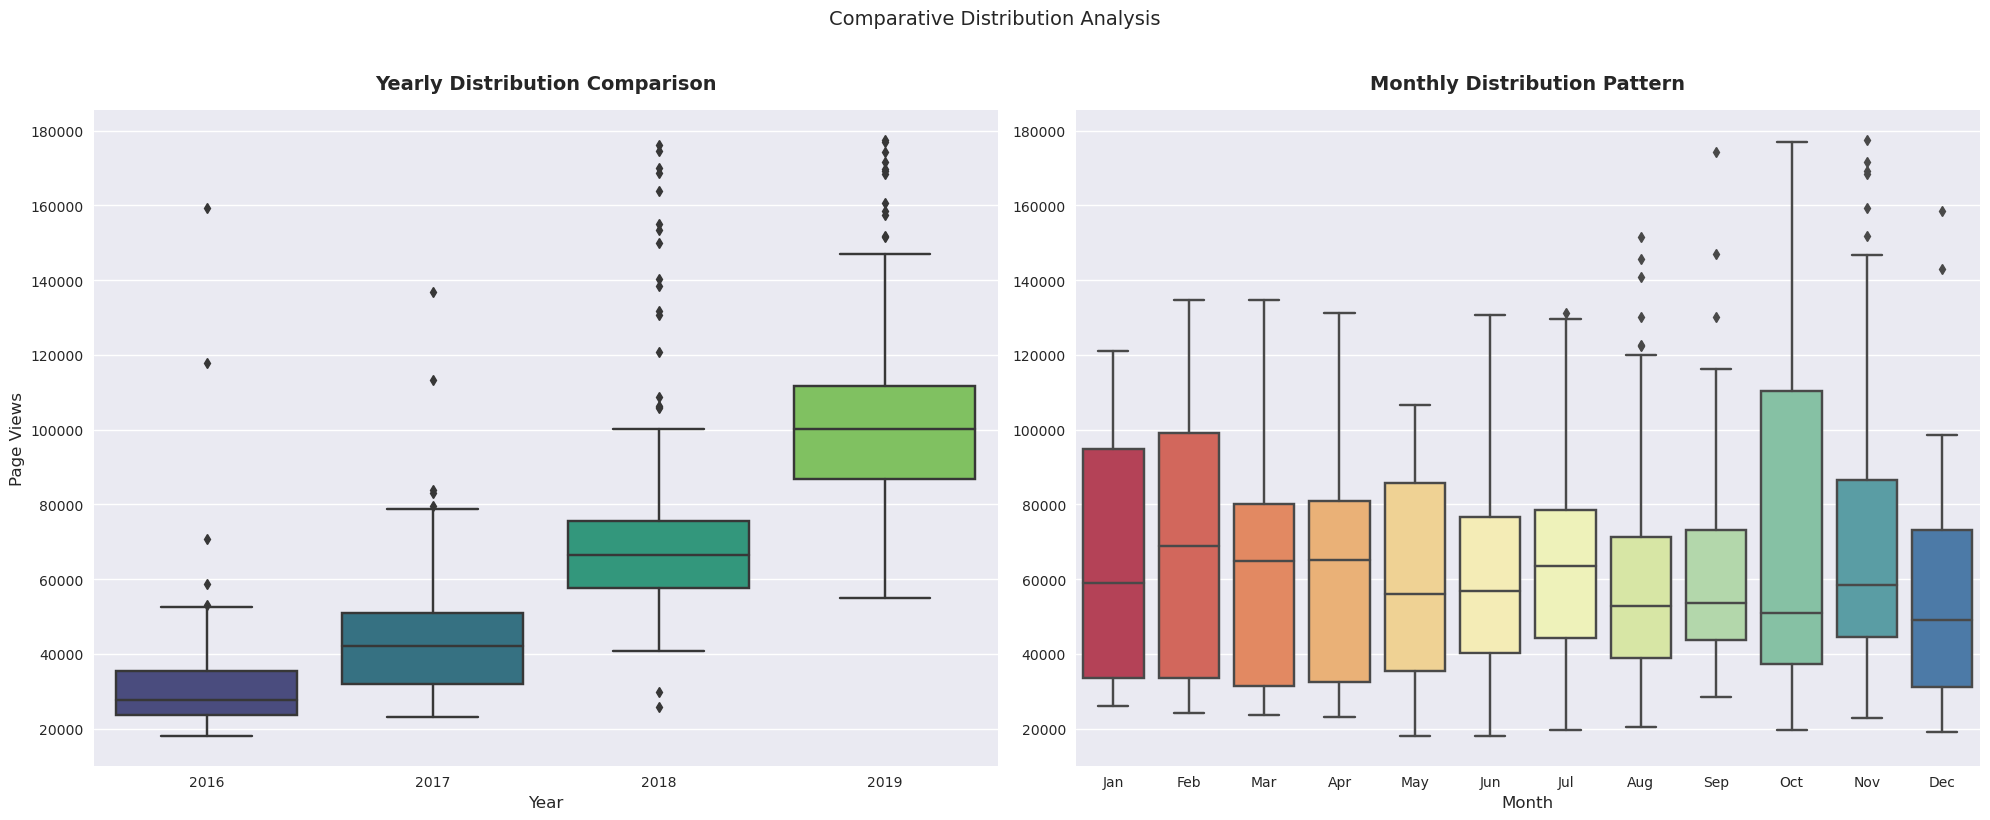

In [29]:
def configure_plots():
    """Set up consistent plot styling"""
    plt.style.use('seaborn-darkgrid')
    plt.rcParams.update({
        'figure.figsize': (12, 6),
        'axes.titlesize': 14,
        'axes.titleweight': 'bold',
        'axes.labelsize': 12,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'font.family': 'DejaVu Sans',  # Ensures Unicode support
    })

def show_or_save(fig, name):
    """Flexible output handling"""
    try:
        # Try to show interactively
        plt.show(block=True)
    except:
        # Fallback to saving
        fig.savefig(f'{name}.png', dpi=150, bbox_inches='tight')
        plt.close(fig)
        print(f"Plot saved as {name}.png")

if __name__ == "__main__":
    configure_plots()
    df = import_data()
    df_clean = clean_data(df)
    
    # Create and display/save plots
    show_or_save(enhanced_line_plot(df_clean), 'forum_views_trend')
    show_or_save(seasonal_decomposition_plot(df_clean), 'seasonal_decomposition')
    show_or_save(heatmap_plot(df_clean), 'views_heatmap')
    show_or_save(comparative_boxplot(df_clean), 'comparative_distributions')

# Further Addition of Information

# 1. Backend issues

Try these backends in order:

In [59]:
for backend in ['TkAgg', 'Qt5Agg', 'MacOSX', 'WXAgg']:
    try:
        matplotlib.use(backend, force=True)
        break
    except:
        continue

# 2. Best Practice Implementation:

In [63]:
import platform

def setup_environment():
    """Configure environment based on where it's running"""
    if 'IPython' in sys.modules:
        from IPython import get_ipython
        get_ipython().run_line_magic('matplotlib', 'inline')
    elif platform.system() == 'Linux' and 'DISPLAY' not in os.environ:
        matplotlib.use('Agg')  # For headless Linux systems
    else:
        try:
            matplotlib.use('TkAgg')
        except:
            matplotlib.use('Agg')

if __name__ == "__main__":
    setup_environment()
    # Rest of your code...

Loaded backend module://matplotlib_inline.backend_inline version unknown.


# 3. Set PyQt as Matplotlib Backend
- To make matplotlib use PyQt, add this at the start of your Python script:

In [64]:
import matplotlib
#matplotlib.use('Qt5Agg')  # Set backend to PyQt5

# 4. Test Interactive Plotting
Run this code to check if plots appear in a PyQt window:

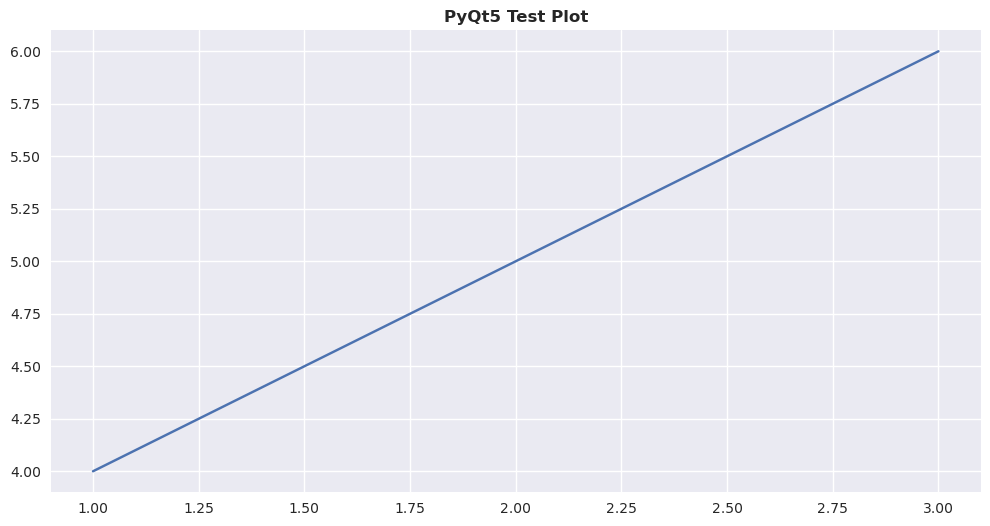

In [65]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3], [4, 5, 6])
plt.title("PyQt5 Test Plot")
plt.show()  # Should open in a separate window

## If We Want the Complete Solution:
- Create a file named time_series_visualizer.py with this content:

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def import_data():
    url = "https://raw.githubusercontent.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/master/fcc-forum-pageviews.csv"
    return pd.read_csv(url, parse_dates=['date'], index_col='date')

def clean_data(df):
    lower = df['value'].quantile(0.025)
    upper = df['value'].quantile(0.975)
    return df[(df['value'] >= lower) & (df['value'] <= upper)]

# Add the other required functions here...

# Alternative Solution (All in One File):

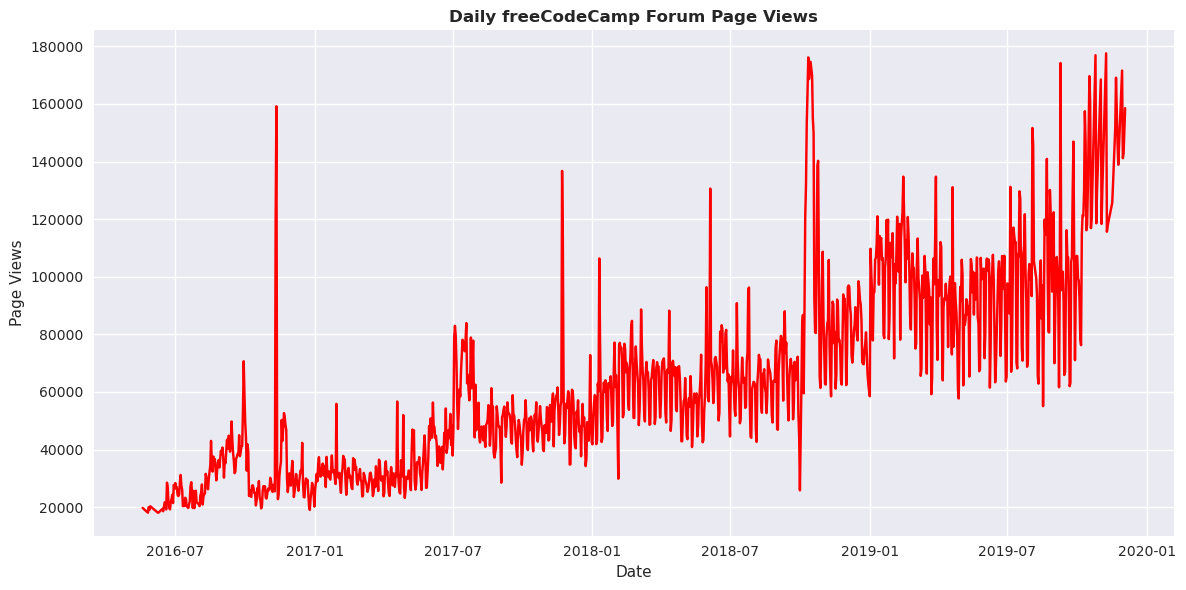

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean data
url = "https://raw.githubusercontent.com/freeCodeCamp/boilerplate-page-view-time-series-visualizer/master/fcc-forum-pageviews.csv"
df = pd.read_csv(url, parse_dates=['date'], index_col='date')

# Clean data
lower = df['value'].quantile(0.025)
upper = df['value'].quantile(0.975)
df_clean = df[(df['value'] >= lower) & (df['value'] <= upper)]

# Basic visualization
plt.figure(figsize=(12, 6))
plt.plot(df_clean.index, df_clean['value'], color='red')
plt.title('Daily freeCodeCamp Forum Page Views')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.tight_layout()
plt.show()